# Customer Personality analysis using  Clustering

Goals for this project  :

* Does the report include a section describing the data?
* Does the report include a paragraph detailing the main objective(s) of this analysis?  
* Does the report include a section with variations of Unsupervised Learning models and specifies which one is the model that best suits the main objective(s) of this analysis?
* Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
* Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?

In this project you will use the tools and techniques you learned throughout this course to develop a few clustering models or dimension reduction transformations on a data set that you feel passionate about. Then, you will select the algorithm regression that best suits your needs, and communicate insights you found from your clustering or dimension reduction exercise.

After going through some guided steps, you will have insights that either group similar observations together or explain a data set in a projection of less dimensions.

## **Brief Desription about the data**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Content
#### Attributes

#### People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
    
#### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

Target
* Need to perform clustering to summarize customer segments.

Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

## Main Objective

In companies usually during marketing campaigns, all customers are not targetted with the same specific offers and coupons. Usually before the start of the marketing campaign, companies usually look into their historically stored customer data to identify group of customers where they are aware of the behaviour of the customer, aware of their likes and dislikes and based on that they are targetted with certain products and coupons.

For our use case as part of the final lab in clustering techniques we are also going to dwelve into a similar customer data, where we have information about 2,240 customers we are given information like: 
* Personal information about the customer like what is their highest level of education, family size, income 
* Customer profile information like How recently the customer has purchased, how many times customer has complined about a product, likes and dislikes of the customer based on what and how much of certain priducts the customer has bought
* Customers interaction with previous campaigns, whether the customer was converted using first touch second touch or nth touch
* Place of purchase for the customer, like if the customer made purchases from web, catalog, store etc.


These informations are really helpful in identifying different groups of customers, and helps companies target specific customers with specific offers,
Like someone who purchases a lot of wine can be offered discount in wine, or maybe given offers to be able to purchase meat and fruits with wine at discounted prices. This might be a lucrative offer for some customers but may not work with certain other customers who might have a lot of kinds at home and may prefer sweets.

In this project we will be first going over the data set and do some simple EDA followed by different ways of feature engineering and dimention reduction techniques.

We will be trying to idnetify atleast 3 to 4 cluster of customers as well as try and learn about their preferences using customer profiling.

    

#### Loading the data and packages

In [366]:
import warnings 
warnings.filterwarnings('ignore')

In [367]:
# !pip install yellowbrick

In [368]:
# import skillsnetwork
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
from datetime import datetime


from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
%matplotlib inline


from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [369]:
cst = pd.read_csv('data/marketing_campaign.csv', sep='\t')

cst.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [370]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

Overall the data looks to have around 2,240 values with few categorical columns and monstly integer variables, Income is the only column with some missing values 

dt_customer which is date of the customer enrollment with the comany is currently a string field and might need to be changed to a date field later

### Exploring the data nd doing some feature engineering

Removing the null variables sience there are only around 24 null values in the data for the income columns

In [371]:
cst.dropna(inplace=True)

In [372]:
cst.select_dtypes(include='number').columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [373]:
sns.set_palette("colorblind")

Visualizing the feautures using histogram plot

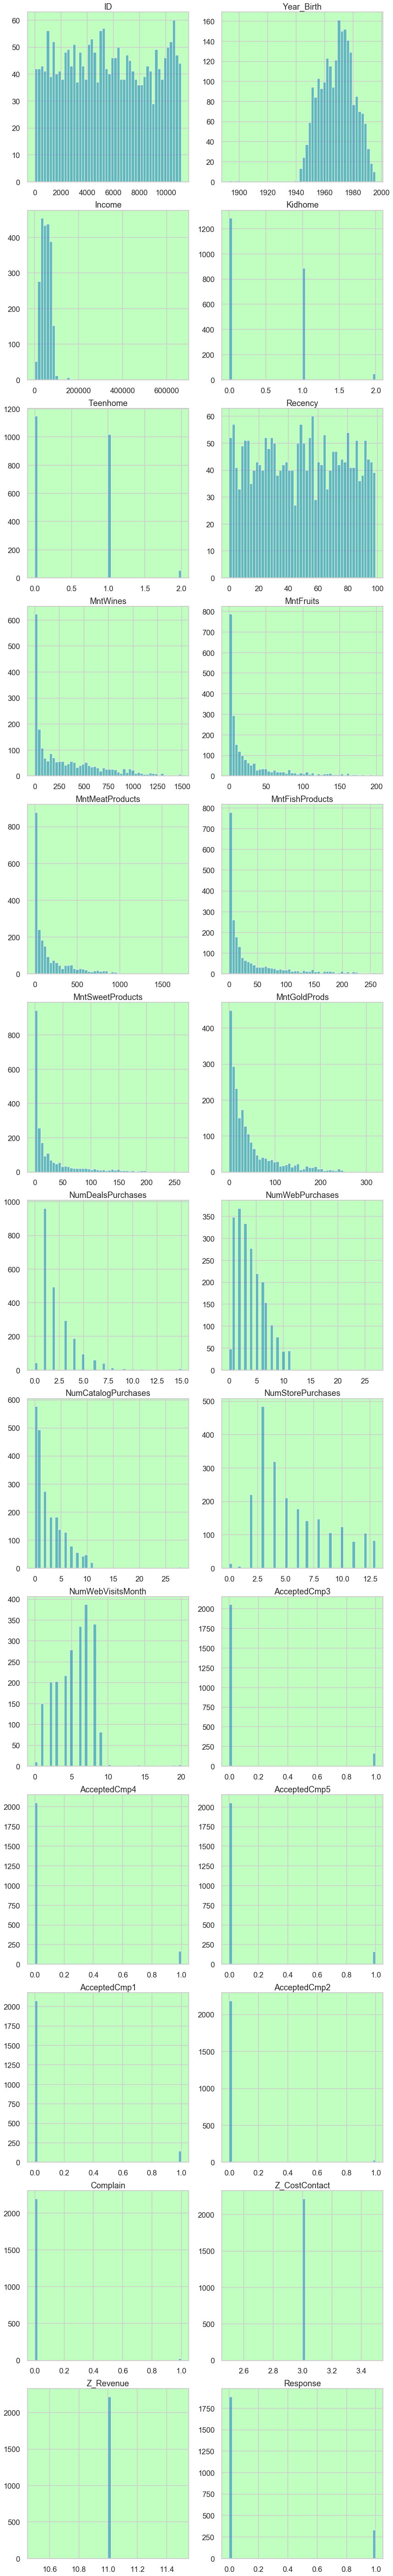

In [374]:
num_columns = len(cst.select_dtypes(include='number').columns)
num_columns
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
num_rows = (num_columns + 1) // 2
num_rows
plt.rcParams['axes.facecolor'] = '#C1FFC1'
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))

# Flatten the axes array if there is only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(cst.select_dtypes(include='number').columns):
    row = i // 2
    col = i % 2
#     print(row,col, column)
    ax = axes[row][col]

    ax.hist(cst[column], bins=50, alpha=0.5)
    ax.set_title(column)

# Remove empty subplots
if num_columns % 2 != 0:
    axes[-1][-1].axis('off')

plt.tight_layout()
plt.show()

lets convert dt_customer to a date field, and assuming they are still customer I will be caulculating how ling they have been a customer

In [375]:
# Convert "Dt_customer" column to datetime
cst['Dt_Customer'] = pd.to_datetime(cst['Dt_Customer'])

# Calculate the number of days as a customer
current_date = datetime.now().date()
cst['Days_as_customer'] = (current_date - cst['Dt_Customer'].dt.date).dt.days
# Display the updated DataFrame
# display(cst)

utilize year_birth to calculate age in years for each customers

In [376]:
#Feature Engineering
#Age of customer today 
cst["Age"] = current_date.year-cst["Year_Birth"]

let's look at the categorical fields

In [377]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
ID                     2216 non-null int64
Year_Birth             2216 non-null int64
Education              2216 non-null object
Marital_Status         2216 non-null object
Income                 2216 non-null float64
Kidhome                2216 non-null int64
Teenhome               2216 non-null int64
Dt_Customer            2216 non-null datetime64[ns]
Recency                2216 non-null int64
MntWines               2216 non-null int64
MntFruits              2216 non-null int64
MntMeatProducts        2216 non-null int64
MntFishProducts        2216 non-null int64
MntSweetProducts       2216 non-null int64
MntGoldProds           2216 non-null int64
NumDealsPurchases      2216 non-null int64
NumWebPurchases        2216 non-null int64
NumCatalogPurchases    2216 non-null int64
NumStorePurchases      2216 non-null int64
NumWebVisitsMonth      2216 non-null int64
AcceptedCmp3        

Education

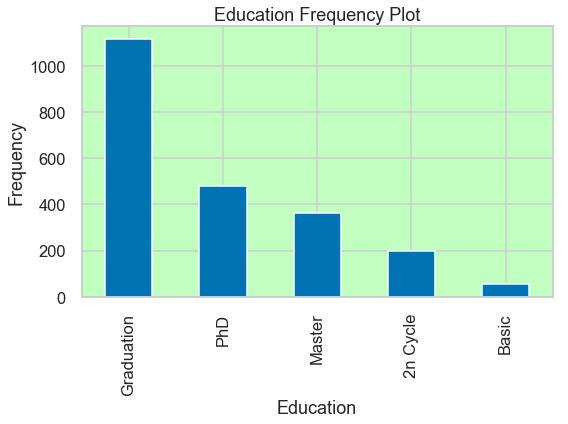

In [378]:
education_counts = cst['Education'].value_counts()

plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar')
# sns.set_palette('prism')  # Specify a custom color palette
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education Frequency Plot')

plt.tight_layout()
plt.show()

Overall we see that mostly customers are Graduated or have done Phd, few of them are undergraduate, we will replace them as
Master, PHD as Post Graduate
Graduation as Graduate
and Basic and 2n cycle as Basic

In [379]:
# Define the mapping for education groups
education_mapping = {
    'graduate': ['Graduation'],
    'Post Graduation': ['PhD','Master'],
    'primary education': ['Basic', '2n Cycle']
}

# Function to map education categories to groups
def map_category_education(cat):
    for group, categories in education_mapping.items():
        if cat in categories:
#             print(cat, group)
            return group
    return cat

# Create a new column with updated education groups
cst['Education'] = cst['Education'].apply(map_category_education)

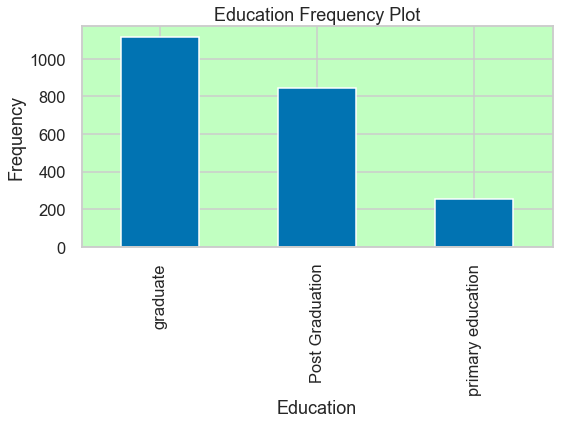

In [380]:
education_counts = cst['Education'].value_counts()

plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar')
# sns.set_palette('prism')  # Specify a custom color palette
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education Frequency Plot')

plt.tight_layout()
plt.show()

Marital_Status

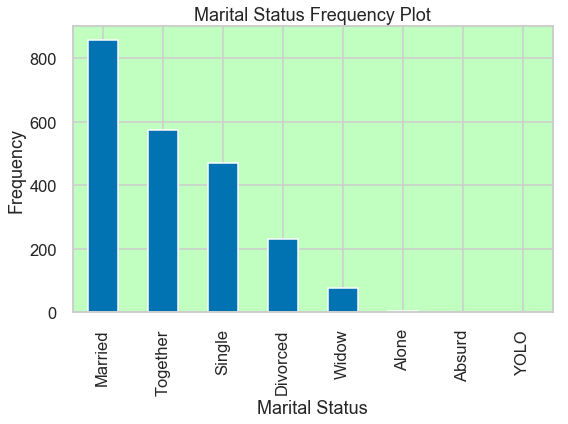

In [381]:
ms_counts = cst['Marital_Status'].value_counts()

plt.figure(figsize=(8, 6))
ms_counts.plot(kind='bar')
# sns.set_palette('twilight_shifted')  # Specify a custom color palette
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital Status Frequency Plot')

plt.tight_layout()
plt.show()

Top 2 categories of the customers are Either Married and together, we can reduce the categories to make them as couples
and the rest such as Single, Divorced, Widow, Alone, Absurd, Yolo as Single

In [382]:
# Define the mapping for education groups
ms_mapping = {
    'Couple': ['Married','Together'],
    'Single': ['Absurd', 'Widow', 'YOLO', 'Divorced', 'Single','Alone']
}

# Function to map education categories to groups
def map_category_ms(cat):
    for group, categories in ms_mapping.items():
        if cat in categories:
#             print(cat, group)
            return group
    return cat

# Create a new column with updated education groups
cst['Marital_Status'] = cst['Marital_Status'].apply(map_category_ms)

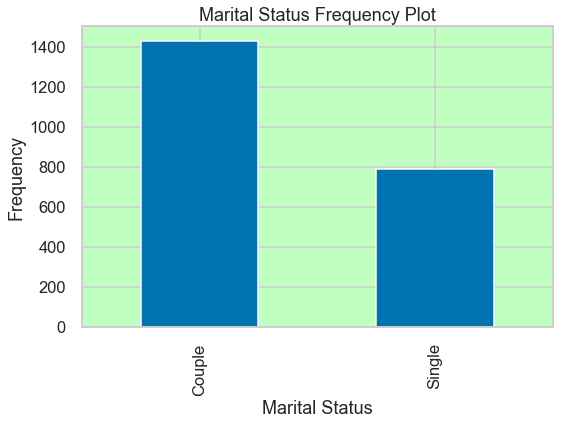

In [383]:
ms_counts = cst['Marital_Status'].value_counts()

plt.figure(figsize=(8, 6))
ms_counts.plot(kind='bar')
# sns.set_palette('prism')  # Specify a custom color palette
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital Status Frequency Plot')

plt.tight_layout()
plt.show()

In [34]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
ID                     2216 non-null int64
Year_Birth             2216 non-null int64
Education              2216 non-null object
Marital_Status         2216 non-null object
Income                 2216 non-null float64
Kidhome                2216 non-null int64
Teenhome               2216 non-null int64
Dt_Customer            2216 non-null datetime64[ns]
Recency                2216 non-null int64
MntWines               2216 non-null int64
MntFruits              2216 non-null int64
MntMeatProducts        2216 non-null int64
MntFishProducts        2216 non-null int64
MntSweetProducts       2216 non-null int64
MntGoldProds           2216 non-null int64
NumDealsPurchases      2216 non-null int64
NumWebPurchases        2216 non-null int64
NumCatalogPurchases    2216 non-null int64
NumStorePurchases      2216 non-null int64
NumWebVisitsMonth      2216 non-null int64
AcceptedCmp3        

#Feature indicating total children living in the household


In [384]:
cst["Children"]=cst["Kidhome"]+cst["Teenhome"]


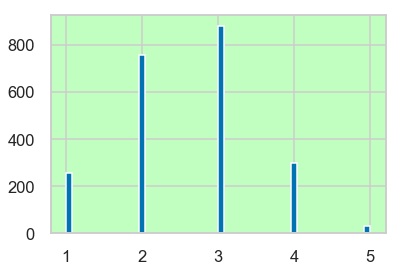

In [385]:
## total members in the household

cst["members_in_hsld"] = cst["Marital_Status"].replace({"Single": 1, "Couple":2})+ cst["Children"]

cst.members_in_hsld.hist(bins = 50)

We have family sizes ranging from 1 to 5

We can also create a features identifying parents in the dataset, using the children column


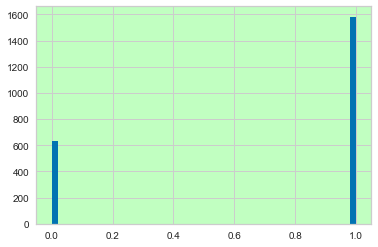

In [37]:

#Feature pertaining parenthood
cst["Parent"] = np.where(cst.Children> 0, 1, 0)
cst["Parent"].hist(bins = 50)

There are around 600 customers with no kinds in the house and around 1600 customers have kids in the house

Also, lets look at total spending done by customers, by using the individual item fields that which denote amout spend on those items by customers

In [38]:
cst["Spent"] = cst["MntWines"]+ cst["MntFruits"]+ cst["MntMeatProducts"]+ cst["MntFishProducts"]+ cst["MntSweetProducts"]+ cst["MntGoldProds"]

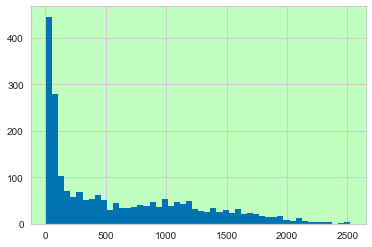

In [39]:
cst.Spent.hist(bins = 50)

We have a positively skewed distributions where most customers have spent less than 100 in the last two years

Lets also look at the customers who accepted offers in campaign, and we want to create a column number of times contacted before response, if a customer did not respond at all then we keep it as 0


In [40]:

# Create an empty list to store the values for the new column
contacted_before_response = []

# Iterate over each row in the DataFrame
for _, row in cst.iterrows():
    contacted_campaigns = []
    
    # Check each campaign column and add the campaign number to the list if the customer accepted the offer
    if row['AcceptedCmp1'] == 1:
        contacted_campaigns.append(1)
    if row['AcceptedCmp2'] == 1:
        contacted_campaigns.append(2)
    if row['AcceptedCmp3'] == 1:
        contacted_campaigns.append(3)
    if row['AcceptedCmp4'] == 1:
        contacted_campaigns.append(4)
    if row['AcceptedCmp5'] == 1:
        contacted_campaigns.append(5)
    
    # If the customer was contacted at least once, join the campaign numbers with '&'
    # Otherwise, set the value as '0'
    if contacted_campaigns:
        contacted_before_response.append(min(contacted_campaigns))
    else:
        contacted_before_response.append(0)

# Assign the list as a new column in the DataFrame
cst['number_of_times_contacted'] = contacted_before_response

# Print the updated DataFrame
print(cst.head(6))

     ID  Year_Birth        Education Marital_Status   Income  Kidhome  \
0  5524        1957         graduate         Single  58138.0        0   
1  2174        1954         graduate         Single  46344.0        1   
2  4141        1965         graduate         Couple  71613.0        0   
3  6182        1984         graduate         Couple  26646.0        1   
4  5324        1981  Post Graduation         Couple  58293.0        1   
5  7446        1967  Post Graduation         Couple  62513.0        0   

   Teenhome Dt_Customer  Recency  MntWines  ...  Z_CostContact  Z_Revenue  \
0         0  2012-04-09       58       635  ...              3         11   
1         1  2014-08-03       38        11  ...              3         11   
2         0  2013-08-21       26       426  ...              3         11   
3         0  2014-10-02       26        11  ...              3         11   
4         0  2014-01-19       94       173  ...              3         11   
5         1  2013-09-09   

In [41]:
# cst = cst.drop('number_of_times_contacted',axis = 1)

In [42]:
cst.number_of_times_contacted.value_counts()

0    1757
1     142
3     135
4     107
5      58
2      17
Name: number_of_times_contacted, dtype: int64

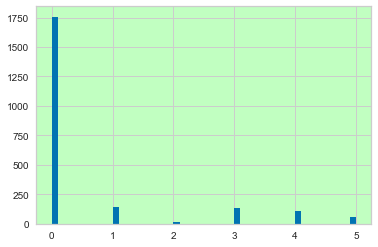

In [43]:
cst.number_of_times_contacted.hist(bins = 50)

There are around close to 140 customers who responded either in the 1st contact ot the third with a lot of customers who did no respind to any of the campaigns as well

Lets us dtop some of the features that we donot need anymore

* Z_CostContact, Z_Revenue only have 0 inthem so we can drop these fields as they are not carrying any information
* ID We can remove ID field as theis is a unique indentifier for the customers and can be dropped
* Year_Birth has been utilized to create age and can be dropped
* Dt_Customer has been utilized to calculate Days_as_Customer and can be dropped

In [44]:
cst1 = cst.copy()

In [45]:
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
cst = cst.drop(to_drop, axis=1)

In [46]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
Education                    2216 non-null object
Marital_Status               2216 non-null object
Income                       2216 non-null float64
Kidhome                      2216 non-null int64
Teenhome                     2216 non-null int64
Recency                      2216 non-null int64
MntWines                     2216 non-null int64
MntFruits                    2216 non-null int64
MntMeatProducts              2216 non-null int64
MntFishProducts              2216 non-null int64
MntSweetProducts             2216 non-null int64
MntGoldProds                 2216 non-null int64
NumDealsPurchases            2216 non-null int64
NumWebPurchases              2216 non-null int64
NumCatalogPurchases          2216 non-null int64
NumStorePurchases            2216 non-null int64
NumWebVisitsMonth            2216 non-null int64
AcceptedCmp3                 2216 non-null int64
Accepte

In [47]:
cst.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Complain,Response,Days_as_customer,Age,Children,members_in_hsld,Parent,Spent,number_of_times_contacted
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.013538,0.009477,0.150271,3630.006318,54.179603,0.947202,2.592509,0.714350,607.075361,0.586191
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.115588,0.096907,0.357417,232.469034,11.985554,0.749062,0.905722,0.451825,602.900476,1.314194
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3118.000000,27.000000,0.000000,1.000000,0.000000,5.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,3458.000000,46.000000,0.000000,2.000000,0.000000,69.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,3631.000000,53.000000,1.000000,3.000000,1.000000,396.500000,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,3804.000000,64.000000,1.000000,3.000000,1.000000,1048.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,4181.000000,130.000000,3.000000,5.000000,1.000000,2525.000000,5.000000


In the above output there are a couple of columns that seems to have some outliers:
    * income - max of income looks to be very big, compared to the mean and median values
    * Age - Max value of age which is a derived field is 130
    

Let's look at the pair plot for some of these features

In [48]:
from matplotlib import colors

In [54]:
plt.rcParams['axes.facecolor'] = '#F7E7CE'

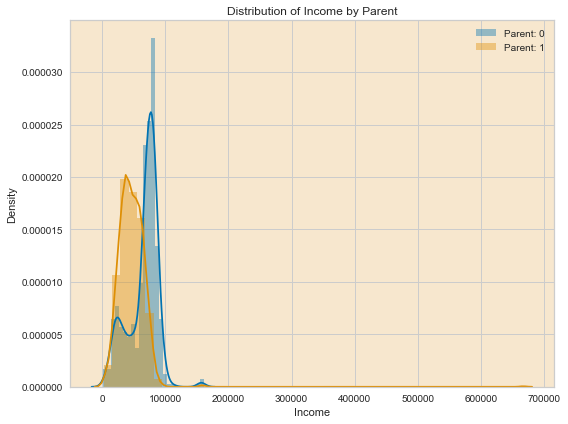

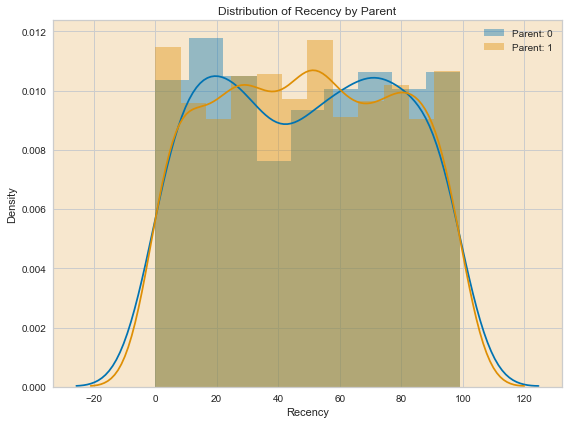

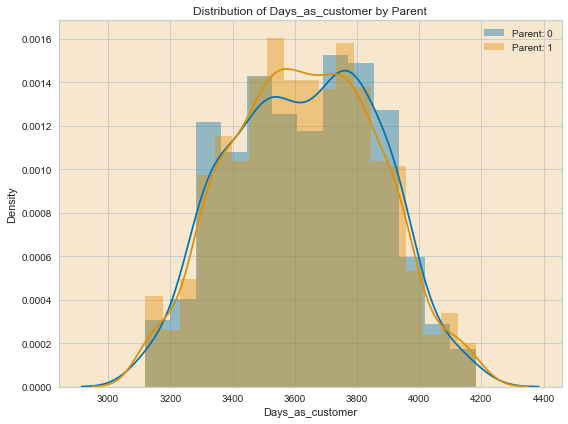

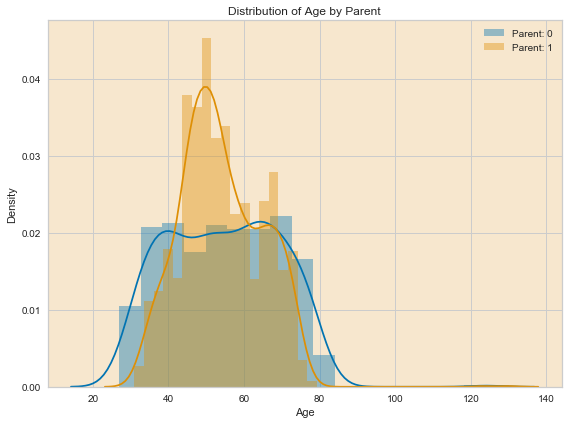

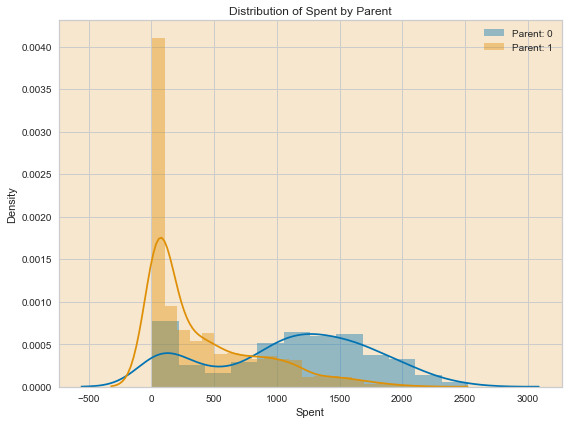

In [55]:
features = ["Income", "Recency", "Days_as_customer", "Age", "Spent"]
parent_vs_not = cst.groupby('Parent')

# Plotting distribution plots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    for parent, data in parent_vs_not:
        sns.distplot(data[feature], label=f"Parent: {parent}")
    
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} by Parent')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Few things observed from the above Distributions – 
* Income – Income of customers as parents are lower compared to customers who are not parent
* Recency, Days as a customer – We do not see much of a difference
* Age – We see there are more customers in the age of 40 to 60 who are parents’ vs people who are not parents have more of a uniform distribution
* Spent – Customers tent to spend much less when they are parent and the distributions is right skewed, whereas when they are not parent the peak is around 1000 to 1500, but the peak is not very long


Lets also look at what products usally parents vs non parents spend on 

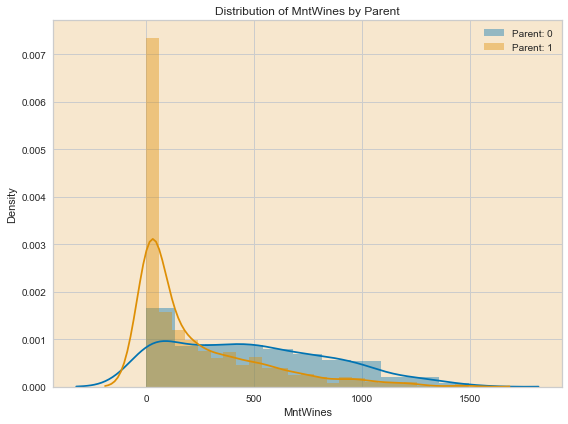

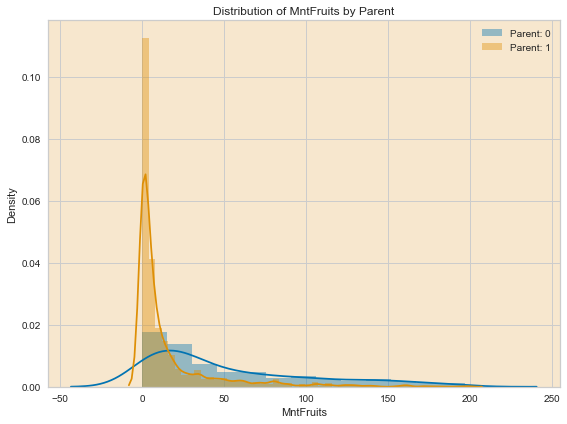

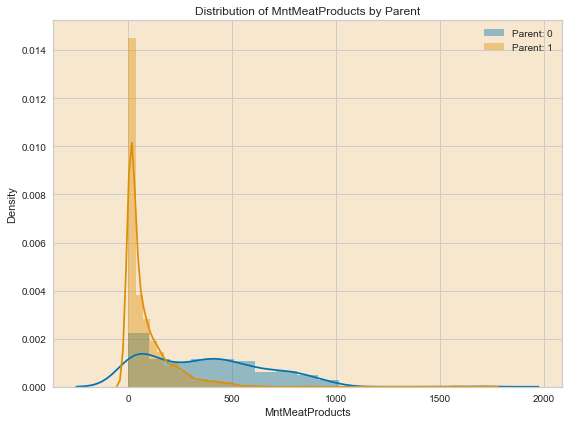

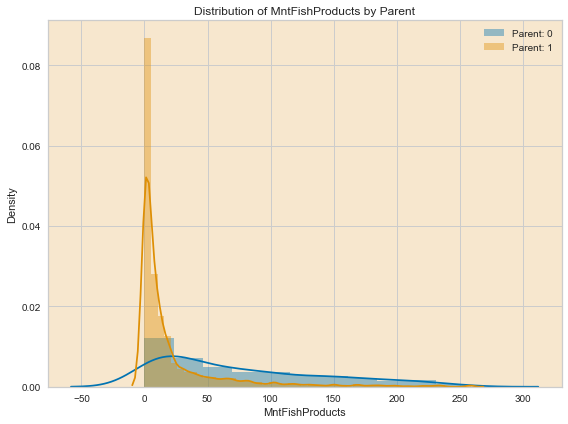

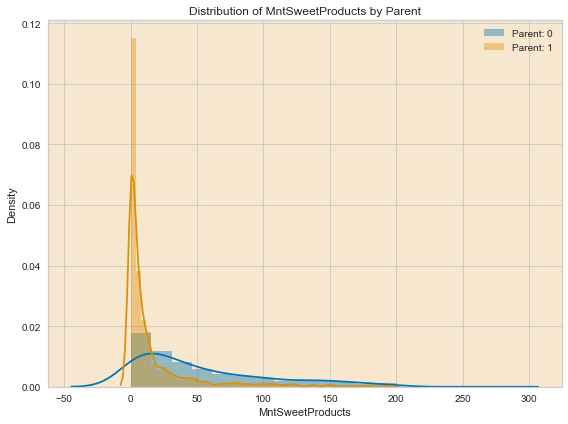

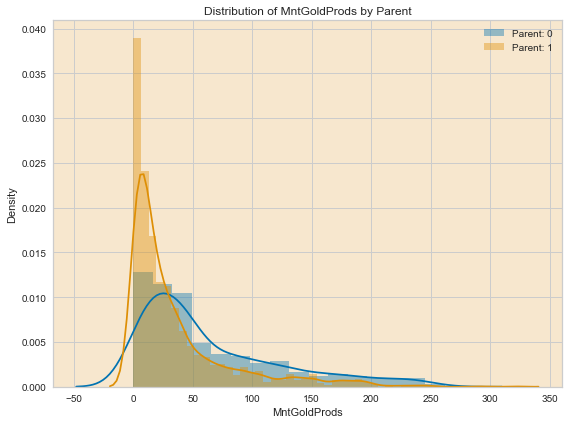

In [56]:
features = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
parent_vs_not = cst.groupby('Parent')

# Plotting distribution plots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    for parent, data in parent_vs_not:
        sns.distplot(data[feature], label=f"Parent: {parent}")
    
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} by Parent')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

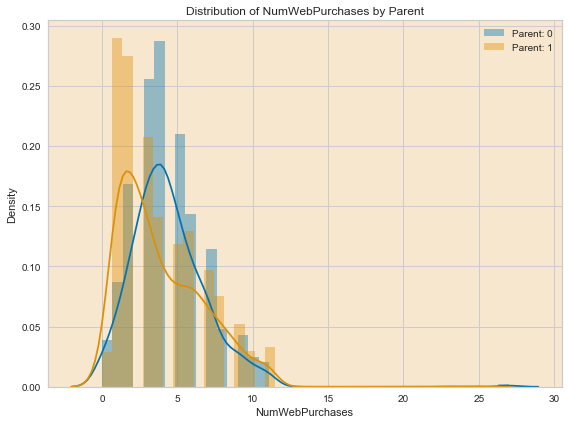

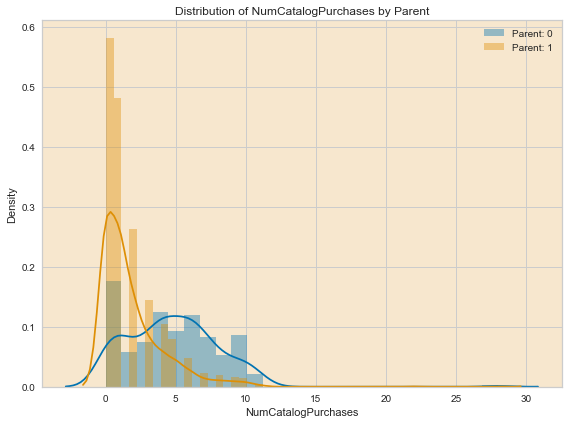

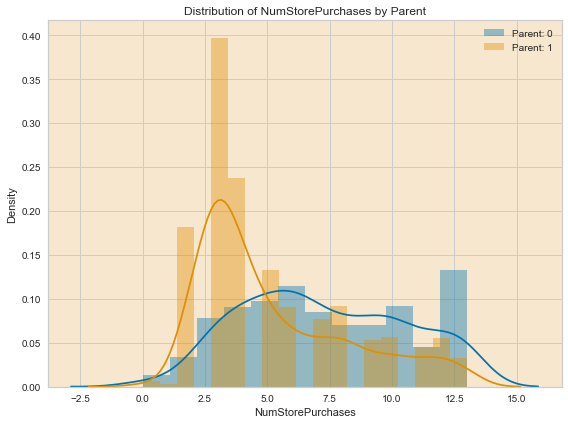

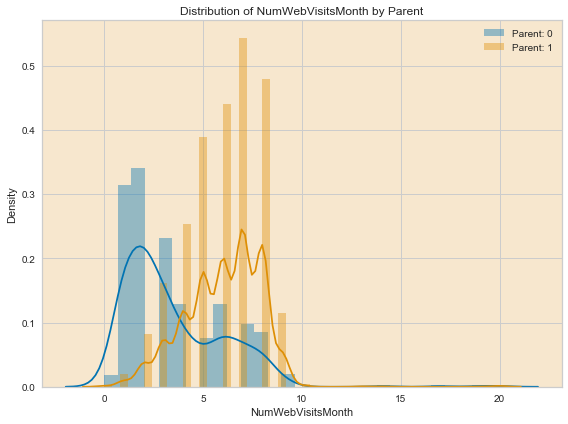

In [57]:
features = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
parent_vs_not = cst.groupby('Parent')

# Plotting distribution plots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    for parent, data in parent_vs_not:
        sns.distplot(data[feature], label=f"Parent: {parent}")
    
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature} by Parent')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Overall from the above distribution we tend to learn that – 
* Parents tend to make less web purchases compared to non-parents
* Non-parents tend to make more catalog purchases
* Both parents and non-parents make quite a bit of in store purchases
* Web visits for parents is more than Non-parents, this is bit counter intuitive given non-parents make more web purchases. This might mean that parents look into the web to see what products are available but go to the market to buy them after looking at their quality


## Removing outliers from Income and age

In [58]:
plt.rcParams['axes.facecolor'] = '#E6E6FA' 

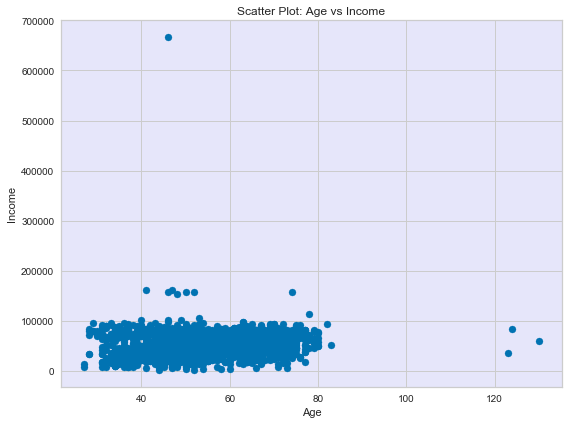

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(cst['Age'], cst['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot: Age vs Income')

plt.tight_layout()
plt.show()

In [60]:
#Dropping the outliers by setting a cap on Age and income. 
cst = cst[(cst["Age"]<90)]
cst = cst[(cst["Income"]<120000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 1583


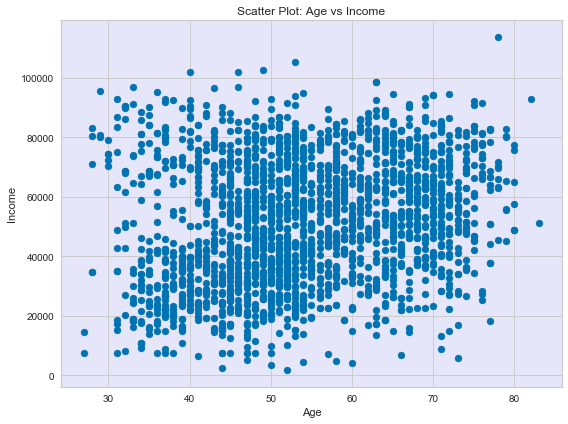

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(cst['Age'], cst['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot: Age vs Income')

plt.tight_layout()
plt.show()

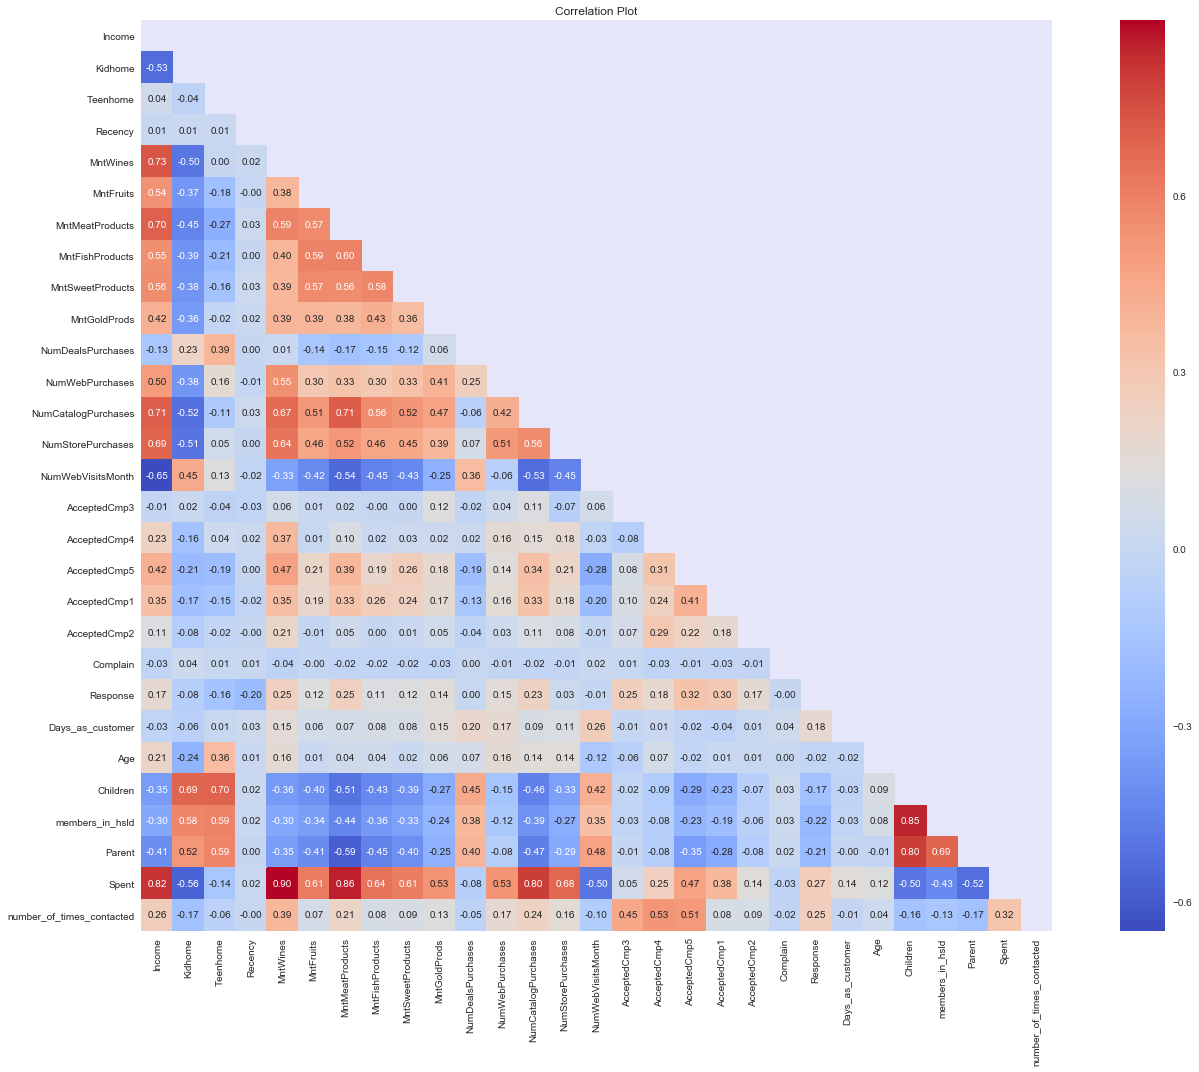

In [62]:
# Compute the correlation matrix
corr_matrix = cst.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Replace diagonal correlation values with 0
np.fill_diagonal(corr_matrix.values, 0)

# Create the correlation plot
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask, square=True)

plt.title("Correlation Plot")
plt.tight_layout()
plt.show()

In [63]:
# Find the features with the highest correlation for each feature
feature_correlations = {}
for feature in corr_matrix.columns:
    highest_correlation = corr_matrix[feature].drop(feature).abs().idxmax()
    correlation_value = corr_matrix.loc[feature, highest_correlation]
    feature_correlations[feature] = (highest_correlation, correlation_value)

# Display the features with the highest correlation
for feature, (highest_correlation, correlation_value) in feature_correlations.items():
    print(f"Feature '{feature}' has the highest correlation with '{highest_correlation}' (correlation value: {correlation_value})")

Feature 'Income' has the highest correlation with 'Spent' (correlation value: 0.8237696997821258)
Feature 'Kidhome' has the highest correlation with 'Children' (correlation value: 0.6876973074761599)
Feature 'Teenhome' has the highest correlation with 'Children' (correlation value: 0.6977604071177551)
Feature 'Recency' has the highest correlation with 'Response' (correlation value: -0.20041313589102588)
Feature 'MntWines' has the highest correlation with 'Spent' (correlation value: 0.8972622864601097)
Feature 'MntFruits' has the highest correlation with 'Spent' (correlation value: 0.614464358048227)
Feature 'MntMeatProducts' has the highest correlation with 'Spent' (correlation value: 0.8568381194036021)
Feature 'MntFishProducts' has the highest correlation with 'Spent' (correlation value: 0.6444531019789786)
Feature 'MntSweetProducts' has the highest correlation with 'Spent' (correlation value: 0.609244078592569)
Feature 'MntGoldProds' has the highest correlation with 'Spent' (correla

Deleting some columns based on high correlation

In [64]:
cst3 = cst.copy()
cols_del = ['Kidhome', 'Teenhome', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','Children']
cst = cst.drop(cols_del, axis=1)

### Feature Engineering

Get the categorical columns

In [65]:
cat = (cst.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [66]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    cst[i]=cst[[i]].apply(LE.fit_transform)
    


In [67]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 23 columns):
Education                    2205 non-null int32
Marital_Status               2205 non-null int32
Income                       2205 non-null float64
Recency                      2205 non-null int64
MntWines                     2205 non-null int64
MntFruits                    2205 non-null int64
MntMeatProducts              2205 non-null int64
MntFishProducts              2205 non-null int64
MntSweetProducts             2205 non-null int64
MntGoldProds                 2205 non-null int64
NumDealsPurchases            2205 non-null int64
NumWebPurchases              2205 non-null int64
NumCatalogPurchases          2205 non-null int64
NumStorePurchases            2205 non-null int64
NumWebVisitsMonth            2205 non-null int64
Complain                     2205 non-null int64
Response                     2205 non-null int64
Days_as_customer             2205 non-null int64
Age      

All the features are now numerical

In [68]:
cst2 = cst.copy()

Scaling the data

In [69]:
# #Creating a copy of data
# ds = cst.copy()
# # creating a subset of dataframe by dropping the features on deals accepted and promotions
# cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
# ds = ds.drop(cols_del, axis=1)



In [70]:
cst.describe()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days_as_customer,Age,members_in_hsld,Parent,Spent,number_of_times_contacted
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,0.733333,0.355102,51622.094785,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,5.823583,5.336961,0.009070,0.15102,3630.062585,54.095692,2.593651,0.715193,606.821769,0.586848
std,0.651398,0.478653,20713.063826,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,3.241796,2.413535,0.094827,0.35815,232.528808,11.705801,0.906197,0.451425,601.675284,1.313517
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,3118.000000,27.000000,1.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,35196.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,3.000000,0.000000,0.00000,3458.000000,46.000000,2.000000,0.000000,69.000000,0.000000
50%,1.000000,0.000000,51287.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,5.000000,6.000000,0.000000,0.00000,3631.000000,53.000000,3.000000,1.000000,397.000000,0.000000
75%,1.000000,1.000000,68281.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,8.000000,7.000000,0.000000,0.00000,3804.000000,64.000000,3.000000,1.000000,1047.000000,0.000000
max,2.000000,1.000000,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,13.000000,20.000000,1.000000,1.00000,4181.000000,83.000000,5.000000,1.000000,2525.000000,5.000000


In [71]:
#Scaling
scaler = StandardScaler()
scaler.fit(cst)
scaled_cst = pd.DataFrame(scaler.transform(cst),columns= cst.columns )

In [72]:
scaled_cst.describe()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Days_as_customer,Age,members_in_hsld,Parent,Spent,number_of_times_contacted
count,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,...,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03,2.205000e+03
mean,6.042030e-19,2.970665e-17,1.237672e-17,6.968475e-17,-2.754159e-17,4.823554e-17,2.001422e-17,-3.479202e-17,2.854859e-17,4.093475e-17,...,1.487850e-16,9.450742e-17,3.492293e-16,1.270840e-16,8.390366e-16,1.447066e-16,-7.653238e-17,-1.369527e-16,-1.495402e-17,4.838659e-17
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,...,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.126039e+00,-7.420464e-01,-2.409272e+00,-1.694318e+00,-9.073768e-01,-6.638056e-01,-7.592345e-01,-6.888332e-01,-6.597177e-01,-8.517658e-01,...,-1.796814e+00,-2.211765e+00,-9.567297e-02,-4.217637e-01,-2.202646e+00,-2.315248e+00,-1.759012e+00,-1.584660e+00,-1.000470e+00,-4.468776e-01
25%,-1.126039e+00,-7.420464e-01,-7.932106e-01,-8.646014e-01,-8.362482e-01,-6.135234e-01,-6.857507e-01,-6.341008e-01,-6.353993e-01,-6.777670e-01,...,-8.711908e-01,-9.684928e-01,-9.567297e-02,-4.217637e-01,-7.401303e-01,-6.917534e-01,-6.552495e-01,-1.584660e+00,-8.940766e-01,-4.468776e-01
50%,4.094688e-01,-7.420464e-01,-1.618161e-02,-3.135738e-04,-3.798401e-01,-4.626766e-01,-4.469284e-01,-4.699038e-01,-4.651706e-01,-3.684357e-01,...,-2.541090e-01,2.747790e-01,-9.567297e-02,-4.217637e-01,4.032307e-03,-9.362368e-02,4.485131e-01,6.310503e-01,-3.488084e-01,-4.468776e-01
75%,4.094688e-01,1.347625e+00,8.044529e-01,8.639742e-01,5.952136e-01,1.658516e-01,3.062803e-01,2.233725e-01,1.671076e-01,2.308937e-01,...,6.715138e-01,6.892030e-01,-9.567297e-02,-4.217637e-01,7.481949e-01,8.462945e-01,4.485131e-01,6.310503e-01,7.317536e-01,-4.468776e-01
max,1.944977e+00,1.347625e+00,2.999363e+00,1.728262e+00,3.517411e+00,4.339279e+00,7.163236e+00,4.036392e+00,5.711701e+00,5.354193e+00,...,2.214218e+00,6.076714e+00,1.045227e+01,2.370996e+00,2.369867e+00,2.469790e+00,2.656038e+00,6.310503e-01,3.188785e+00,3.360561e+00


all the features are now scaled

## Dimentionality Reduction using PCA

Let's try to reduce the number of features to 6 components

In [73]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 15):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(scaled_cst)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': scaled_cst.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,"PCA(copy=True, iterated_power='auto', n_compon...",0.330969
2,"PCA(copy=True, iterated_power='auto', n_compon...",0.425059
3,"PCA(copy=True, iterated_power='auto', n_compon...",0.494052
4,"PCA(copy=True, iterated_power='auto', n_compon...",0.558559
5,"PCA(copy=True, iterated_power='auto', n_compon...",0.608507
6,"PCA(copy=True, iterated_power='auto', n_compon...",0.653315
7,"PCA(copy=True, iterated_power='auto', n_compon...",0.697082
8,"PCA(copy=True, iterated_power='auto', n_compon...",0.735536
9,"PCA(copy=True, iterated_power='auto', n_compon...",0.771161


In [74]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Age,Complain,Days_as_customer,Education,Income,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,...,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Parent,Recency,Response,Spent,members_in_hsld,number_of_times_contacted
n,,,,,,,,,,,,,,,,,,,,,
1,0.012147,0.003064,0.008294,0.004863,0.077468,0.007069,0.064730,0.062305,0.050662,0.075713,...,0.015024,0.065005,0.047554,0.056865,0.056234,0.000821,0.024158,0.085316,0.048395,0.026938
2,0.030300,0.002098,0.033946,0.021748,0.050472,0.030224,0.044053,0.041610,0.042412,0.047468,...,0.070415,0.056914,0.072598,0.060258,0.072511,0.001572,0.016129,0.056661,0.073840,0.024299
3,0.037222,0.003147,0.056466,0.019935,0.048599,0.060207,0.036694,0.034191,0.035474,0.033585,...,0.058965,0.048682,0.058197,0.070611,0.056892,0.015976,0.053823,0.040812,0.081115,0.032257
4,0.048158,0.007834,0.062894,0.051708,0.045528,0.053049,0.044014,0.041686,0.041557,0.025302,...,0.054104,0.037828,0.046160,0.061412,0.045435,0.019787,0.052828,0.032756,0.064676,0.045035
5,0.056047,0.006747,0.052175,0.050267,0.038436,0.075351,0.037406,0.035548,0.037226,0.025623,...,0.052943,0.038476,0.045232,0.051244,0.041885,0.039437,0.062207,0.029463,0.067927,0.055486
6,0.056484,0.008846,0.052014,0.046165,0.034841,0.071448,0.037239,0.036957,0.033857,0.024361,...,0.051201,0.036321,0.041716,0.047720,0.040644,0.069417,0.057264,0.028635,0.058417,0.068126
7,0.059816,0.049404,0.052252,0.044464,0.032862,0.066615,0.034489,0.034431,0.034942,0.023287,...,0.049467,0.033360,0.040179,0.045685,0.039132,0.065462,0.055070,0.026806,0.054471,0.065034
8,0.060757,0.050126,0.066219,0.052246,0.031017,0.067286,0.032433,0.030828,0.036125,0.024619,...,0.048169,0.033229,0.041428,0.041570,0.042322,0.060740,0.053181,0.023832,0.048282,0.071748
9,0.080422,0.049000,0.061720,0.062249,0.029941,0.061922,0.031552,0.028940,0.040424,0.025710,...,0.046123,0.035804,0.038986,0.037912,0.041738,0.055281,0.050816,0.023987,0.044100,0.073873


In [78]:
plt.rcParams['axes.facecolor'] = '#FFE6E6'

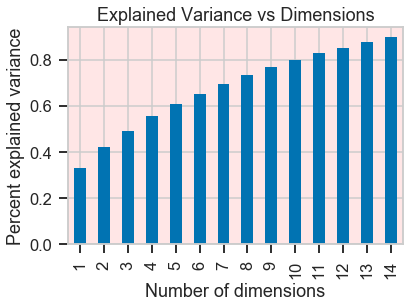

In [79]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

it can be observed that with PCA we are not getting components that are able to explain a lot of the variance, lets also try using Ker PCA

## kERNEl PCA

In [80]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4,6,8,10]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(scaled_cst)

kernelPCA.best_estimator_

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=0.05, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=10, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [81]:
pca_list_kernel = list()
feature_weight_list_kernel = list()

# Fit a range of PCA models

for n in range(1, 15):
    
    # Create and fit the model
    PCAmod_kernel = KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=0.05, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=n, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)
    PCAmod_kernel.fit(scaled_cst)
    kpca_transform = PCAmod_kernel.fit_transform(scaled_cst)
    explained_variance = np.var(kpca_transform, axis=0)
    
    # Store the model and variance
    pca_list_kernel.append(pd.Series({'n':n, 'model':PCAmod_kernel,
                               'var': np.sum(explained_variance)}))
    
#     # Calculate and store feature importances
#     abs_feature_values_kernel = np.abs(PCAmod_kernel.components_).sum(axis=0)
#     feature_weight_list_kernel.append(pd.DataFrame({'n':n, 
#                                              'features': scaled_cst.columns,
#                                              'values':abs_feature_values_kernel/abs_feature_values_kernel.sum()}))
    
pca_df_kernel = pd.concat(pca_list_kernel, axis=1).T.set_index('n')
pca_df_kernel

,model,var
n,,
1,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.102997
2,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.143997
3,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.175119
4,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.205285
5,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.230542
6,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.253107
7,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.27112
8,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.288391
9,"KernelPCA(alpha=1.0, coef0=1, copy_X=True, deg...",0.303305


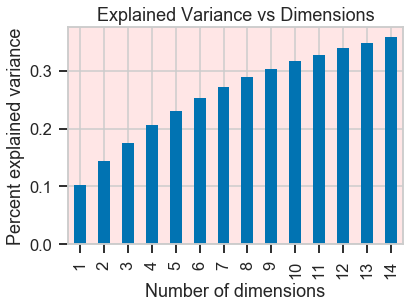

In [82]:
sns.set_context('talk')
ax = pca_df_kernel['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

Kernel PCA is working worse than normal pca in explaining variance, lets work with normla pca and n_components = 10

Intiating pca with 3 dimentions

In [84]:
#Initiating PCA to reduce dimentions aka features to 10
pca = PCA(n_components=10)
pca.fit(scaled_cst)
PCA_cst = pd.DataFrame(pca.transform(scaled_cst), columns=(["col1","col2", "col3","col4","col5", "col6", "col7","col8","col9", "col10"]))
PCA_cst.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2205.0,-3.433887e-17,2.759664,-5.541735,-2.449485,-0.865007,2.292978,7.525609
col2,2205.0,8.458842e-18,1.471413,-3.815185,-1.025963,-0.168579,0.922533,5.710700
col3,2205.0,4.783274e-18,1.259998,-3.019204,-0.950189,-0.116953,0.781773,4.901280
col4,2205.0,1.570928e-17,1.218321,-4.038656,-0.854536,-0.029563,0.805777,4.907283
col5,2205.0,1.701838e-17,1.072067,-2.881045,-0.731562,0.039182,0.719149,3.564705
col6,2205.0,1.384632e-17,1.015422,-3.004901,-0.732887,-0.012602,0.721849,3.126203
col7,2205.0,-3.182136e-17,1.003596,-1.055172,-0.261078,-0.102302,0.081998,10.696535
col8,2205.0,8.660243e-18,0.940689,-2.830656,-0.622787,-0.043996,0.570011,3.805778
col9,2205.0,-7.049035e-18,0.905290,-2.989435,-0.599904,0.026668,0.647858,3.192918
col10,2205.0,4.873904e-17,0.833608,-3.003308,-0.544784,-0.001817,0.543516,3.632541


In [97]:
plt.rcParams['axes.facecolor'] = '#E0FFFF'

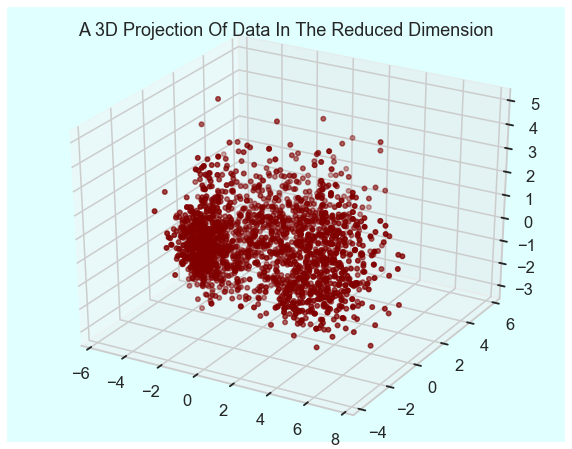

In [98]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_cst["col1"]
y =PCA_cst["col2"]
z =PCA_cst["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Now lets try clustering

Elbow Plot

Elbow Method to determine the number of clusters to be formed:


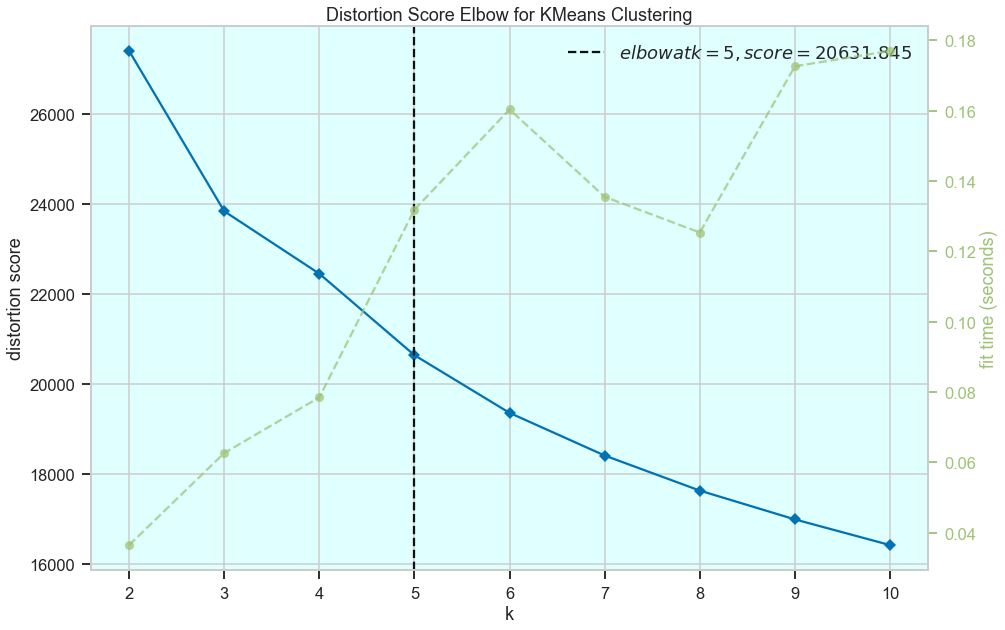

In [108]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
fig = plt.figure(figsize = (15,10))
Elbow = KElbowVisualizer(KMeans(), k=10)
Elbow.fit(PCA_cst)
Elbow.show()

## Kmeans

Above plotindicates that 5 would be the optimum number of clusters in the data

In [ ]:
# We tried with 5 clusters but the algorithms are creating a very small 5th bucket, with not much distinctive features, therefore we dicided to go with 4 clusters

In [142]:
PCA_cst_1 = PCA_cst.copy()

In [143]:
# Specify the number of clusters
n_clusters = 5

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(PCA_cst)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
PCA_cst_1['k_means_Cluster'] = cluster_labels
cst['k_means_Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(PCA_cst_1.head())

       col1      col2      col3      col4      col5      col6      col7  \
0  4.848447  0.055024  3.057552  1.307897 -0.649013 -0.298410  0.300737   
1 -2.475169 -1.164378 -0.641358 -1.115743 -0.976416 -1.029531  0.039167   
2  1.984895 -0.398639 -0.757764  0.300017  0.150038 -0.906918  0.044652   
3 -2.840225 -1.045435 -0.887989  0.061887  1.071235 -0.633378 -0.451717   
4 -0.485337  0.899346 -1.279124  0.221483 -0.574277  0.675272 -0.401319   

       col8      col9     col10  k_means_Cluster  
0 -1.934783 -1.173791  1.428893                2  
1  0.845008 -1.122353  0.653151                4  
2 -0.085662 -0.208993 -1.573446                2  
3  1.147328  0.842789  0.110959                3  
4  0.123030  1.720111  1.336009                1  


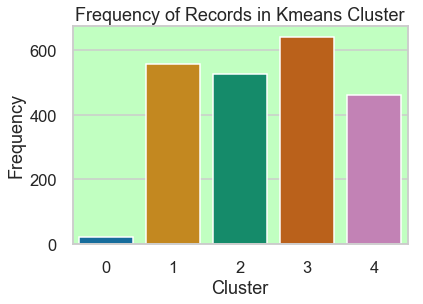

In [389]:
PCA_cst_1.k_means_Cluster.value_counts()
# Count the frequency of records in each cluster
cluster_counts = PCA_cst_1.k_means_Cluster.value_counts()

# Create the bar plot or histogram
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
# If you prefer a histogram plot, you can use sns.histplot() instead:
# sns.histplot(data=data, x='cluster')

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Records in Kmeans Cluster')

# Show the plot
plt.show()

## Agglomerative Clustering

In [394]:
# #Initiating the Agglomerative Clustering model 
# AC = AgglomerativeClustering(n_clusters=5)

# # fit model and predict clusters
# yhat_AC = AC.fit_predict(PCA_cst)

# PCA_cst_1["Agglomerative_Cluster"] = yhat_AC
# #Adding the Clusters feature to the orignal dataframe.
# cst["Agglomerative_Cluster"]= yhat_AC

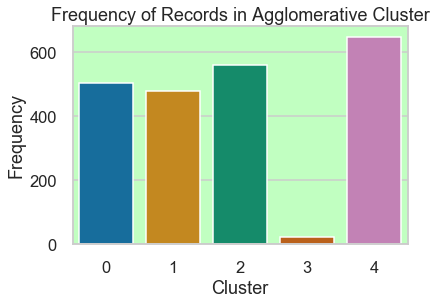

In [393]:
PCA_cst_1.Agglomerative_Cluster.value_counts()
# Count the frequency of records in each cluster
cluster_counts = PCA_cst_1.Agglomerative_Cluster.value_counts()

# Create the bar plot or histogram
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
# If you prefer a histogram plot, you can use sns.histplot() instead:
# sns.histplot(data=data, x='cluster')

# Set labels and title
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Frequency of Records in Agglomerative Cluster')

# Show the plot
plt.show()

In [113]:
cst.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Days_as_customer,Age,members_in_hsld,Parent,Spent,number_of_times_contacted,k_means_Cluster,Agglomerative_Cluster
0,1,1,58138.0,58,635,88,546,172,88,88,...,0,1,4089,66,1,0,1617,0,2,0
1,1,1,46344.0,38,11,1,6,2,1,6,...,0,0,3243,69,3,1,27,0,4,1
2,1,0,71613.0,26,426,49,127,111,21,42,...,0,0,3590,58,2,0,776,0,2,0
3,1,0,26646.0,26,11,4,20,10,3,5,...,0,0,3183,39,3,1,53,0,3,4
4,0,0,58293.0,94,173,43,118,46,27,15,...,0,0,3439,42,3,1,422,0,1,4


## DBSCAN

In [114]:
#Initiating the Agglomerative Clustering model 
dbc_clust = DBSCAN(eps=2.35, min_samples = 3.15)

# fit model and predict clusters
dbc_fit = dbc_clust.fit(PCA_cst)

# Get the cluster labels for each data point
dbc_cluster_labels = dbc_clust.labels_

# dbc_cluster_labels.unique()

PCA_cst_1["DBSCAN_Cluster"] = dbc_cluster_labels
#Adding the Clusters feature to the orignal dataframe.
cst["DBSCAN_Cluster"]= dbc_cluster_labels

In [115]:
cst["DBSCAN_Cluster"].unique()

array([ 0, -1], dtype=int64)

In [116]:
cst["DBSCAN_Cluster"].value_counts()

 0    2044
-1     161
Name: DBSCAN_Cluster, dtype: int64

## Examining the clusters formed

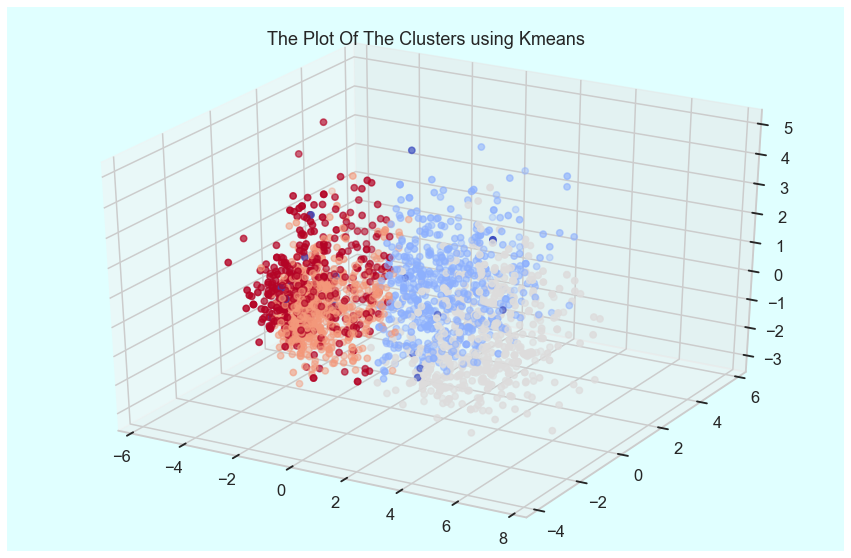

In [118]:
#Plotting the clusters
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_cst_1["k_means_Cluster"], marker='o', cmap="coolwarm" )
ax.set_title("The Plot Of The Clusters using Kmeans")
plt.show()

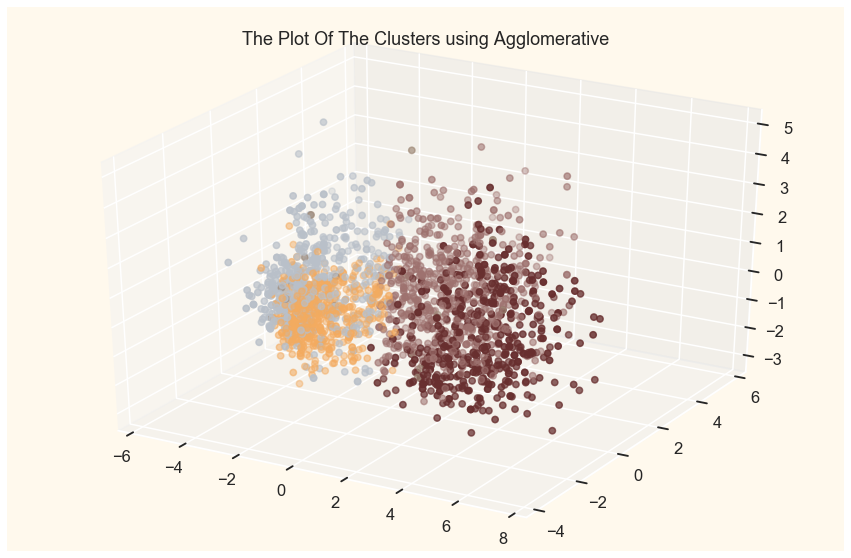

In [326]:
#Plotting the clusters
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_cst_1["Agglomerative_Cluster"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters using Agglomerative")
plt.show()

Kmeans and agglomerative clustering are giving pretty similar results

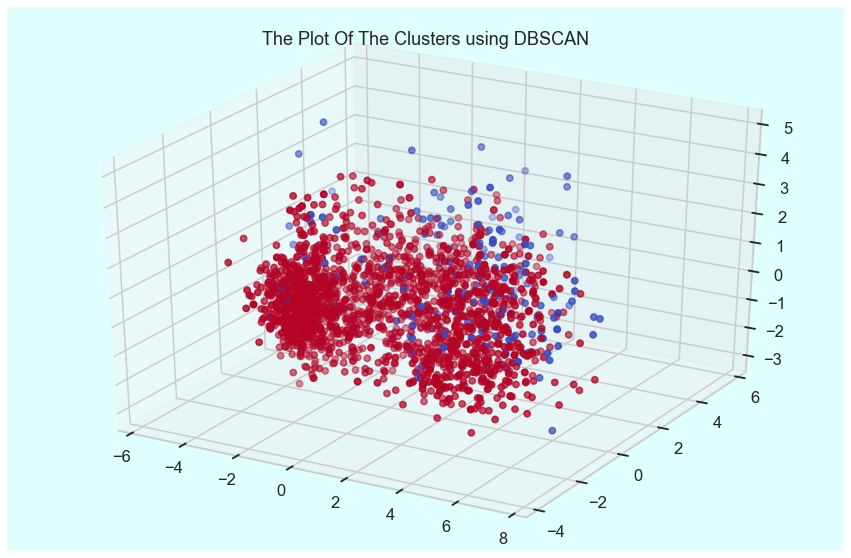

In [120]:
#Plotting the clusters
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_cst_1["DBSCAN_Cluster"], marker='o', cmap="coolwarm" )
ax.set_title("The Plot Of The Clusters using DBSCAN")
plt.show()

DBSCAN is not being able to find much clusters in the data its grouping most of the data into one cluster

## Evaluating clusters

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

In [122]:
plt.rcParams['axes.facecolor'] = '#FFE6E6'

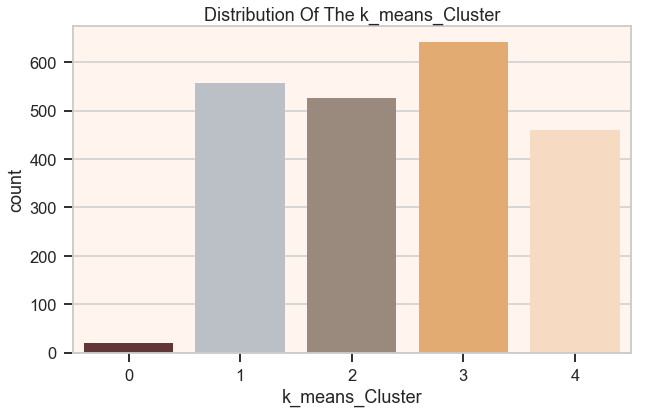

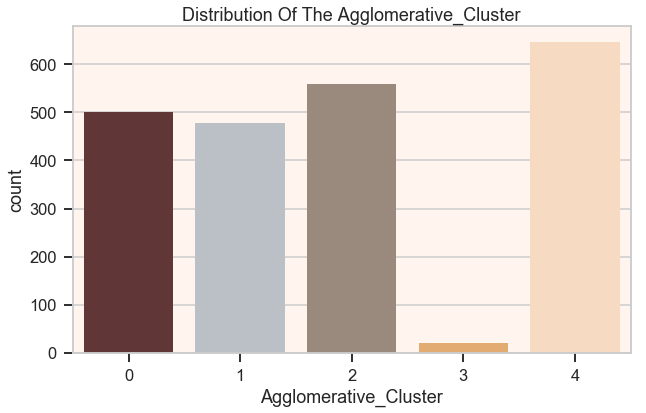

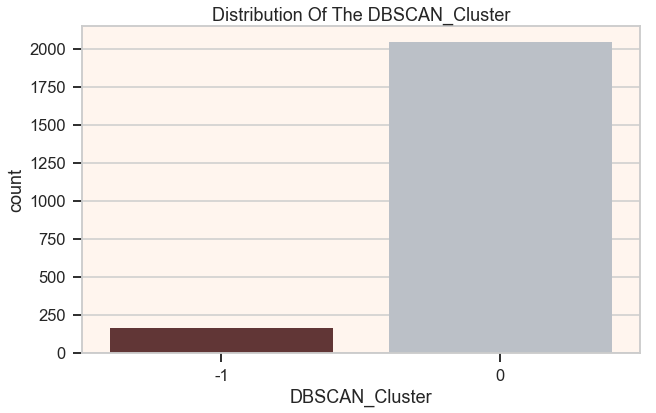

In [182]:
clusters = ['k_means_Cluster','Agglomerative_Cluster', 'DBSCAN_Cluster']

for type in clusters:

    #Plotting countplot of clusters
    plt.figure(figsize=(10, 6))
    pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60",'#FFDAB9']
    pl = sns.countplot(x=cst[type], palette= pal)
    pl.set_title(f"Distribution Of The {type}")
    plt.show()

As we already obeserved K meand and agglomerative clustering have identified similar clusters in the data with 4 dominant clusters and 1 small cluster
where as DB scan has identified most of the data into 1 cluster with 2 very small clusters, DBscan is not working properly for our data

Lets look at how the clusters are divided in Income vs Spending

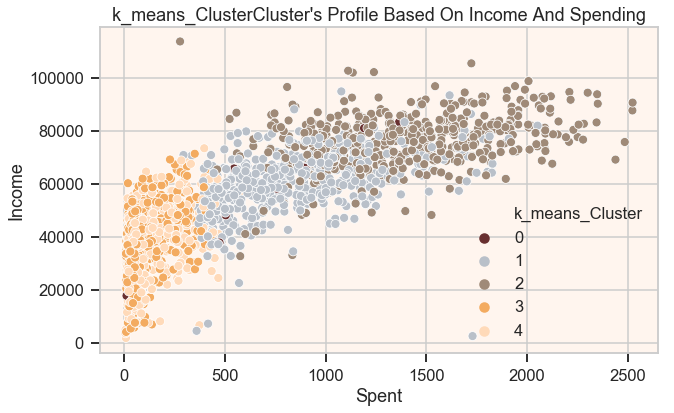

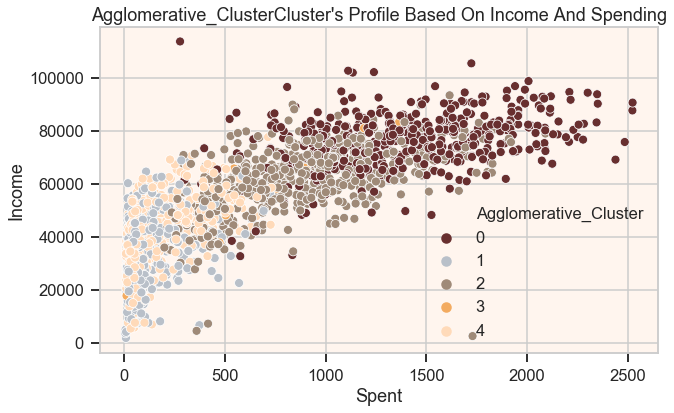

In [183]:
clusters = ['k_means_Cluster','Agglomerative_Cluster']
sns.set_palette("colorblind")
for type in clusters:

    #Plotting countplot of clusters
    plt.figure(figsize=(10, 6))
    pl = sns.scatterplot(data = cst,x=cst["Spent"], y=cst["Income"],hue=cst[type], palette= pal)
    pl.set_title(f"{type}Cluster's Profile Based On Income And Spending")
    plt.legend()
    plt.show()

In the above plot we can see there are nearly 4 type of spending and income groups, and the clusters have identified them both in K means and agglomerative clusters
* Cluster 4 in Kmeans and 4 in Agglomerative seem be showing low income and medium spend category
* Cluster 3 in Kmeans and 1 in Agglomerative seem be showing low income and low spend category
* Cluster 1 in Kmeans and 2 in Agglomerative seem be showing medium income and medium spend category
* Small Cluster 0 in Kmeans and 3 in Agglomerative seem be showing medium income and high spend category
* Cluster 2 in Kmeans and 0 in Agglomerative seem be showing high income and high spend category

In [184]:
plt.rcParams['axes.facecolor'] = '#FFF5EE'

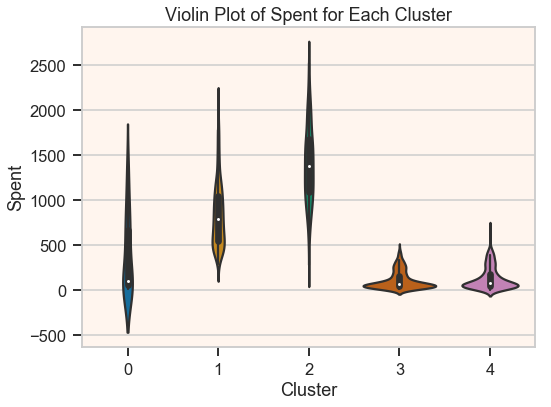

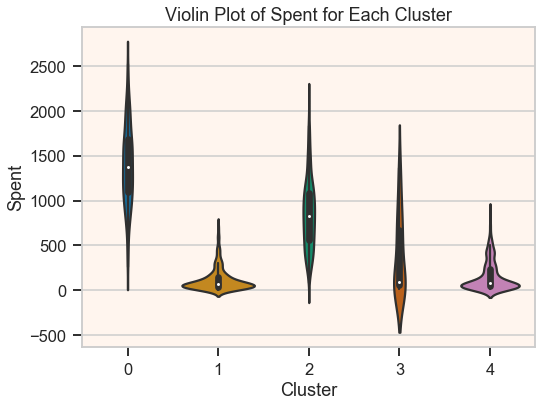

In [185]:

for type in clusters:
    # Specify the column names
    cluster_column = type
    variable_column = 'Spent'

    # Create a violin plot for each cluster
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=cluster_column, y=variable_column, data=cst)
    plt.xlabel('Cluster')
    plt.ylabel('Spent')
    plt.title('Violin Plot of Spent for Each Cluster')
    plt.tight_layout()
    plt.show()

<Figure size 576x432 with 0 Axes>

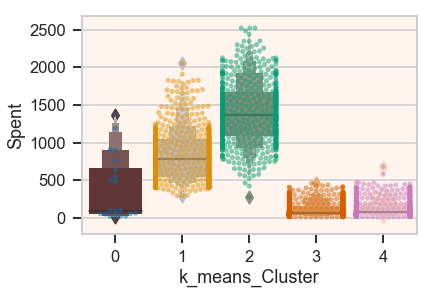

<Figure size 576x432 with 0 Axes>

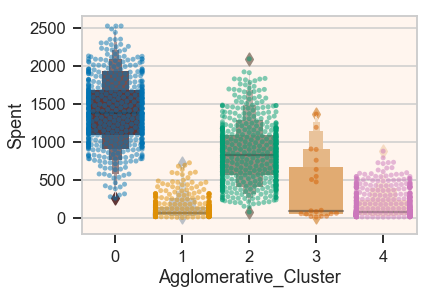

In [186]:
for type in clusters:
    plt.figure(figsize=(8, 6))
    plt.figure()
    pl=sns.swarmplot(x=cst[type], y=cst["Spent"], alpha=0.5 )
    pl=sns.boxenplot(x=cst[type], y=cst["Spent"], palette=pal)
    plt.show()

It can be observed clearly from both the plots that we have 2 clusters predominantly that are spending more compared to the other 3, we will try to check on some other variables as well before starting with the profiling

Lets look at numner of times contacted field

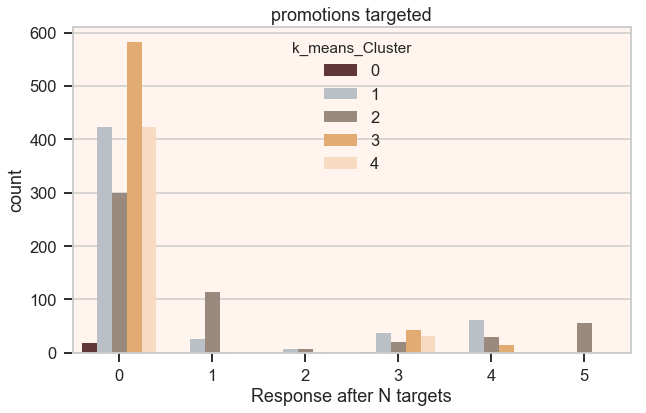

In [188]:
plt.figure(figsize=(10, 6))
pl = sns.countplot(x=cst["number_of_times_contacted"],hue=cst["k_means_Cluster"], palette= pal)
pl.set_title("promotions targeted")
pl.set_xlabel("Response after N targets")
plt.show()

Overall it can be observed that there are not much response to the different campaings, but of the response received, looks like cluster 1 and 2 tend to respond more, these are the high and medium income groups who tend to spend more 

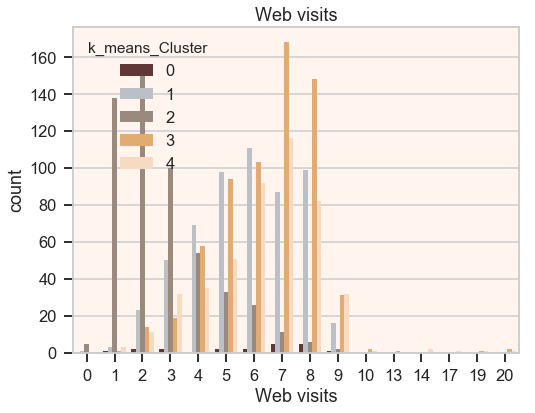

In [191]:
plt.figure(figsize=(8, 6))
pl = sns.countplot(x=cst["NumWebVisitsMonth"],hue=cst["k_means_Cluster"], palette= pal)
pl.set_title("Web visits")
pl.set_xlabel("Web visits")
plt.show()

In [ ]:
Its hard to quatify anything from the above plot but it looks like customers from cluster 3 2 and 1 make more website visits compared to other clusters

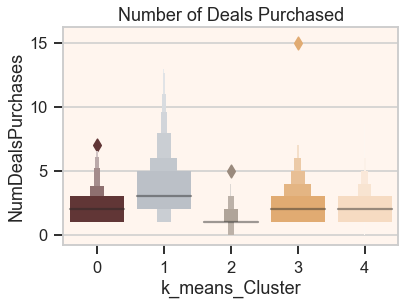

In [190]:
plt.figure()
pl=sns.boxenplot(y=cst["NumDealsPurchases"],x=cst["k_means_Cluster"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

Cluster 4 which is Medium Income and and high spend group seems to respond more to deals where as cluster 1 which is our most spending customers don't respond well to deals

In [131]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 26 columns):
Education                    2205 non-null int32
Marital_Status               2205 non-null int32
Income                       2205 non-null float64
Recency                      2205 non-null int64
MntWines                     2205 non-null int64
MntFruits                    2205 non-null int64
MntMeatProducts              2205 non-null int64
MntFishProducts              2205 non-null int64
MntSweetProducts             2205 non-null int64
MntGoldProds                 2205 non-null int64
NumDealsPurchases            2205 non-null int64
NumWebPurchases              2205 non-null int64
NumCatalogPurchases          2205 non-null int64
NumStorePurchases            2205 non-null int64
NumWebVisitsMonth            2205 non-null int64
Complain                     2205 non-null int64
Response                     2205 non-null int64
Days_as_customer             2205 non-null int64
Age      

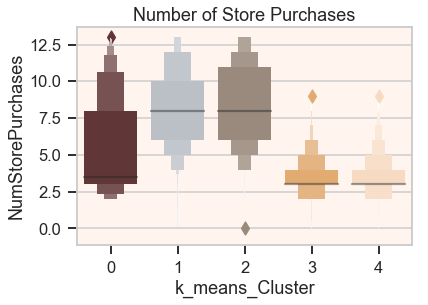

In [192]:
plt.figure()
pl=sns.boxenplot(y=cst["NumStorePurchases"],x=cst["k_means_Cluster"], palette= pal)
pl.set_title("Number of Store Purchases")
plt.show()

Again customers in cluster 1 2 and 0 high and medium income groups tend to make web purchases followed by cluster 3 low income medium spend group

### Summary of CLustering

In [ ]:
During dimention reduction PCA worked better than PCA with RBF, possibly creating too much noise in the data with RBF

Variance is the data is being explained 80%  with normal PCA

K means Clustering and AGGLOMERATIVE clustering were able to give us 4 nicely divided cluster and one small cluster with 20 customers
Whereas DBSCAN dod not work well with our data, most probably the amout of data is quite less for it to work with

Since both K means and Agglomerative clustering were giving similar results, we are going ahead with the clusters we got in Kmeans clustering

## Cluster Profiling

With our Clusters now ready, next thing comes is to learn about these cluster behaviours, to understand our customers. Which of these customers are our best and which customers need more attention. Maybe certain different strategies that needs to be taken to understand their behaviour.

In [145]:
cst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 26 columns):
Education                    2205 non-null int32
Marital_Status               2205 non-null int32
Income                       2205 non-null float64
Recency                      2205 non-null int64
MntWines                     2205 non-null int64
MntFruits                    2205 non-null int64
MntMeatProducts              2205 non-null int64
MntFishProducts              2205 non-null int64
MntSweetProducts             2205 non-null int64
MntGoldProds                 2205 non-null int64
NumDealsPurchases            2205 non-null int64
NumWebPurchases              2205 non-null int64
NumCatalogPurchases          2205 non-null int64
NumStorePurchases            2205 non-null int64
NumWebVisitsMonth            2205 non-null int64
Complain                     2205 non-null int64
Response                     2205 non-null int64
Days_as_customer             2205 non-null int64
Age      

In [153]:
# cst1.info()

In [151]:
cst['Kidhome'] = cst1['Kidhome']
cst['Teenhome'] = cst1['Teenhome']
cst['Children'] = cst1['Children']

In [158]:
cst["k_means_Cluster"].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [166]:
# Personal = ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# for i in Personal:
#     plt.figure()
#     sns.countplot(x=cst[i], data=cst, hue =cst["k_means_Cluster"], palette=pal)
#     plt.show()

In [170]:
# !pip install pandasql

In [171]:
from pandasql import sqldf

### spend vs income

In [199]:
# Define the SQL query
query = '''
    SELECT 
        k_means_Cluster
    ,   round(avg(Spent)) avg_spent
    ,   round(avg(Income)) avg_income
    FROM cst
    group by 1
'''

# Execute the SQL query using sqldf
result_inc_spend = sqldf(query, globals())

# Print the result
print(result_inc_spend)

   k_means_Cluster  avg_spent  avg_income
0                0      392.0     45672.0
1                1      834.0     60033.0
2                2     1398.0     76224.0
3                3      110.0     36597.0
4                4      130.0     34534.0


Text(0.5, 1.0, 'Income vs. Spend by Cluster')

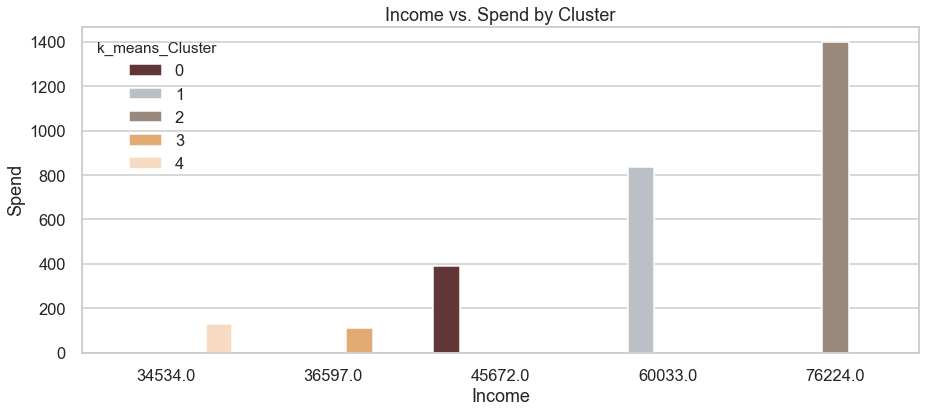

In [200]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 6))
# Create the bar plot
sns.barplot(x="avg_income", y="avg_spent", hue="k_means_Cluster", data=result_inc_spend, palette = pal)

# Set labels and title
plt.xlabel("Income")
plt.ylabel("Spend")
plt.title("Income vs. Spend by Cluster")

# Show the plot

In [ ]:
overall similar to what we have talked about all ready high income people tend to spend more, in our case 
* cluster 2 is the high income high spend group
* Followed by Cluster 1 and 0

In [204]:
# Personal = ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# sns.set(style="whitegrid")
# sns.set_context('talk')
# plt.figure(figsize=(15, 6))
# sns.jointplot(data = result_inc_spend, x="avg_income", y="avg_spent", hue="k_means_Cluster", kind="scatter", palette=pal)
# plt.show()

### Recency vs Spend

Recency has values from 0 to 99, which is number of days since customers last purchase, lets divide them into groups of 25

In [243]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]
# Define the SQL query
query = '''
    SELECT 
        k_means_Cluster
        , case when Recency >=0 and Recency <= 33 then '0_33'
             when Recency >=34 and Recency <= 67 then '34_67'
             when Recency >=67 and Recency <= 100 then '67_100' end as  Recency_groups
        ,   round(avg(Spent)) avg_spent
    FROM cst
   group by 1,2
   order by 2,1
'''

# Execute the SQL query using sqldf
result_rec_spend = sqldf(query, globals())

# Print the result
print(result_rec_spend)

    k_means_Cluster Recency_groups  avg_spent
0                 0           0_33      258.0
1                 1           0_33      801.0
2                 2           0_33     1381.0
3                 3           0_33      106.0
4                 4           0_33      139.0
5                 0          34_67      614.0
6                 1          34_67      851.0
7                 2          34_67     1429.0
8                 3          34_67      105.0
9                 4          34_67      121.0
10                0         67_100      225.0
11                1         67_100      853.0
12                2         67_100     1388.0
13                3         67_100      119.0
14                4         67_100      129.0


Text(0.5, 1.0, 'Recency vs. Spend by Cluster')

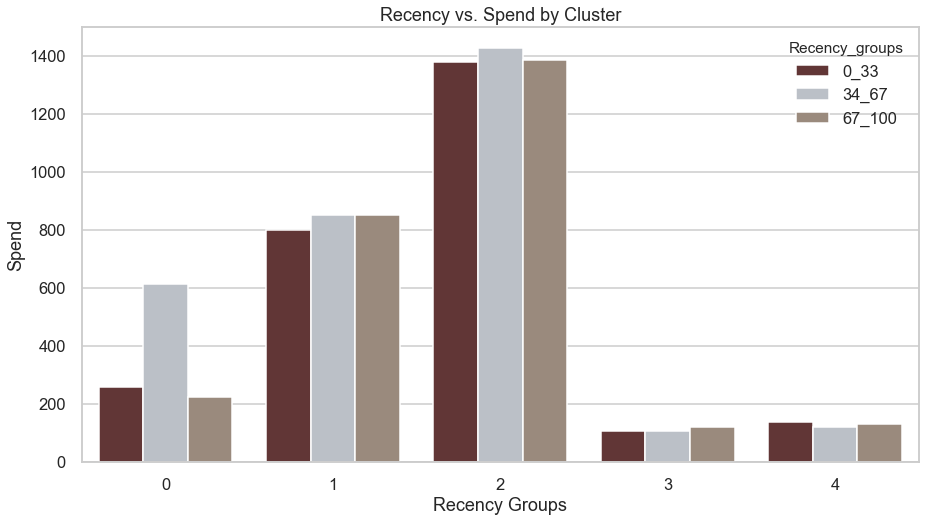

In [318]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 8))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="avg_spent", hue="Recency_groups", data=result_rec_spend, palette = pal)

# Set labels and title
plt.xlabel("Clusters")
plt.ylabel("Spend")
plt.title("Recency vs. Spend by Cluster")

# Show the plot

It can be observed relation between Recency vs Spend is 
* similar mostly for Cluster 2 and 1 which is our customers tending to spend more
* Where as Cluster 0 Doesn't make very frequent purchases

### Children

In [317]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]
# Define the SQL query
query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.Children
    ,   avg_spent
    ,   count
    ,   child_count
    ,   (count/child_count)*100 as pct_of_chld
    from 
    (SELECT 
        k_means_Cluster
        , Children
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as child_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Children
#         , count(*) as child_count
#     FROM cst
#    group by 1
#    order by 2
# '''

# Execute the SQL query using sqldf
result_chi_spend = sqldf(query, globals())

# Print the result
print(result_chi_spend)
result_chi_spend['pcnt_of_child'] = (result_chi_spend['count']/result_chi_spend['child_count'])* 100
result_chi_spend

    k_means_Cluster  Children  avg_spent  count  child_count  pct_of_chld
0                 0         0      797.0      4           20            0
1                 0         1      301.0      9           20            0
2                 0         2      307.0      6           20            0
3                 0         3       99.0      1           20            0
4                 1         0      821.0     25          557            0
5                 1         1      864.0    426          557            0
6                 1         2      702.0     95          557            0
7                 1         3      860.0     11          557            0
8                 2         0     1409.0    461          526            0
9                 2         1     1318.0     64          526            0
10                2         2     1695.0      1          526            0
11                3         1      114.0    397          642            0
12                3         2      106

,k_means_Cluster,Children,avg_spent,count,child_count,pct_of_chld,pcnt_of_child
0,0,0,797.0,4,20,0,20.000000
1,0,1,301.0,9,20,0,45.000000
2,0,2,307.0,6,20,0,30.000000
3,0,3,99.0,1,20,0,5.000000
4,1,0,821.0,25,557,0,4.488330
5,1,1,864.0,426,557,0,76.481149
6,1,2,702.0,95,557,0,17.055655
7,1,3,860.0,11,557,0,1.974865
8,2,0,1409.0,461,526,0,87.642586
9,2,1,1318.0,64,526,0,12.167300


Text(0.5, 1.0, 'Children vs. Count Pctnt by Cluster')

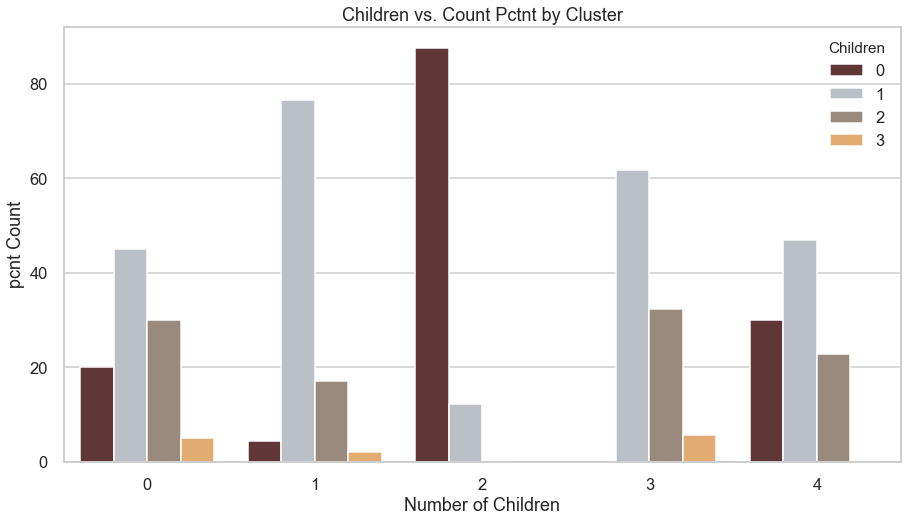

In [316]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 8))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pcnt_of_child", hue="Children", data=result_chi_spend, palette = pal)

# Set labels and title
plt.xlabel("Number of Children")
plt.ylabel("pcnt Count")
plt.title("Children vs. Count Pctnt by Cluster")

# Show the plot

* Our star Cluster, Cluster 2 Mostly have no children or at most 1
* Cluster 3 always have family with kids and has the highest percentage of families with 3 kids
* Cluster 1 have very few families without kids
* Cluster 4 has 0,1 or 2 kids

### Kid Homes and Teen Homes

In [298]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]
# Define the SQL query
query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.Kidhome
    ,   avg_spent
    ,   count
    ,   Kidhome_count
    ,   (count/Kidhome_count)*100 as pct_of_Kidhome
    from 
    (SELECT 
        k_means_Cluster
        , Kidhome
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as Kidhome_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 2,1
'''

# query = '''
    
#    SELECT 
#         Children
#         , count(*) as child_count
#     FROM cst
#    group by 1
#    order by 2
# '''

# Execute the SQL query using sqldf
result_Kidhome_spend = sqldf(query, globals())

# Print the result
print(result_Kidhome_spend)
result_Kidhome_spend['pct_of_Kidhome'] = (result_Kidhome_spend['count']/result_Kidhome_spend['Kidhome_count'])* 100
result_Kidhome_spend

    k_means_Cluster  Kidhome  avg_spent  count  Kidhome_count  pct_of_Kidhome
0                 0        0      704.0      8             20               0
1                 1        0      860.0    420            557               0
2                 2        0     1397.0    519            526               0
3                 3        0      188.0    129            642               0
4                 4        0      170.0    200            460               0
5                 0        1      158.0     11             20               0
6                 1        1      766.0    131            557               0
7                 2        1     1458.0      7            526               0
8                 3        1       91.0    478            642               0
9                 4        1      100.0    256            460               0
10                0        2      473.0      1             20               0
11                1        2      509.0      6            557   

,k_means_Cluster,Kidhome,avg_spent,count,Kidhome_count,pct_of_Kidhome
0,0,0,704.0,8,20,40.000000
1,1,0,860.0,420,557,75.403950
2,2,0,1397.0,519,526,98.669202
3,3,0,188.0,129,642,20.093458
4,4,0,170.0,200,460,43.478261
5,0,1,158.0,11,20,55.000000
6,1,1,766.0,131,557,23.518851
7,2,1,1458.0,7,526,1.330798
8,3,1,91.0,478,642,74.454829
9,4,1,100.0,256,460,55.652174


Text(0.5, 1.0, 'Kids vs. Count Pct by Cluster')

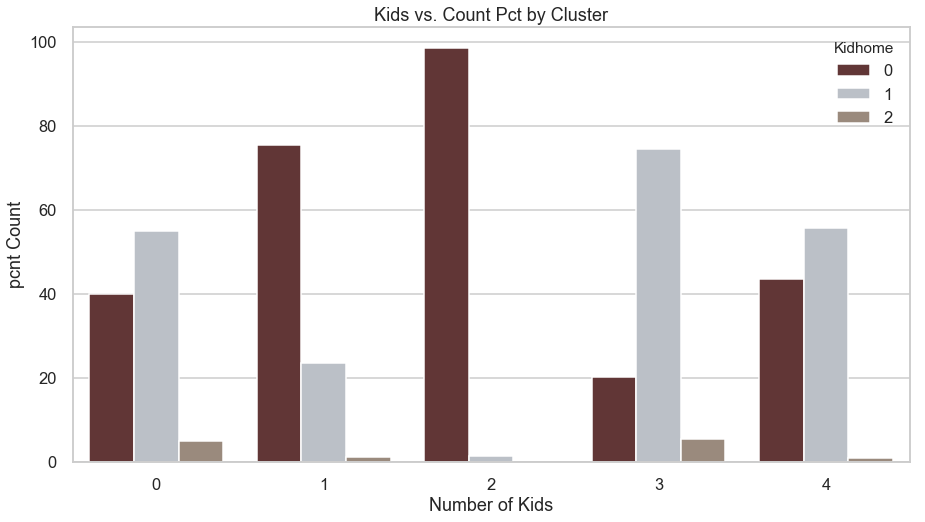

In [315]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 8))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_Kidhome", hue="Kidhome", data=result_Kidhome_spend, palette = pal)

# Set labels and title
plt.xlabel("Number of Kids")
plt.ylabel("pcnt Count")
plt.title("Kids vs. Count Pct by Cluster")

# Show the plot

* Cluster 2 does not have many Kids
* Cluster 3 has most families with 1 kids
* Cluster 1 also comparatively has less number of kids
* Cluster 4 also 0 or 1 kids
* Cluster 0 very few data points but has mostly 1 or 2 kids

In [296]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]
# Define the SQL query
query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.Teenhome
    ,   avg_spent
    ,   count
    ,   Teenhome_count
    ,   (count/Teenhome_count)*100 as pct_of_Teenhome
    from 
    (SELECT 
        k_means_Cluster
        , Teenhome
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as Teenhome_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 2,1
'''

# query = '''
    
#    SELECT 
#         Children
#         , count(*) as child_count
#     FROM cst
#    group by 1
#    order by 2
# '''

# Execute the SQL query using sqldf
result_Teenhome_spend = sqldf(query, globals())

# Print the result
print(result_Teenhome_spend)
result_Teenhome_spend['pct_of_Teenhome'] = (result_Teenhome_spend['count']/result_Teenhome_spend['Teenhome_count'])* 100
result_Teenhome_spend

    k_means_Cluster  Teenhome  avg_spent  count  Teenhome_count  \
0                 0         0      393.0     10              20   
1                 1         0      823.0     80             557   
2                 2         0     1409.0    468             526   
3                 3         0       82.0    286             642   
4                 4         0      125.0    295             460   
5                 0         1      424.0      9              20   
6                 1         1      836.0    448             557   
7                 2         1     1301.0     57             526   
8                 3         1      129.0    336             642   
9                 4         1      138.0    165             460   
10                0         2       99.0      1              20   
11                1         2      841.0     29             557   
12                2         2     1695.0      1             526   
13                3         2      171.0     20             64

,k_means_Cluster,Teenhome,avg_spent,count,Teenhome_count,pct_of_Teenhome
0,0,0,393.0,10,20,50.000000
1,1,0,823.0,80,557,14.362657
2,2,0,1409.0,468,526,88.973384
3,3,0,82.0,286,642,44.548287
4,4,0,125.0,295,460,64.130435
5,0,1,424.0,9,20,45.000000
6,1,1,836.0,448,557,80.430880
7,2,1,1301.0,57,526,10.836502
8,3,1,129.0,336,642,52.336449
9,4,1,138.0,165,460,35.869565


Text(0.5, 1.0, 'Teenhome vs. Count Pct by Cluster')

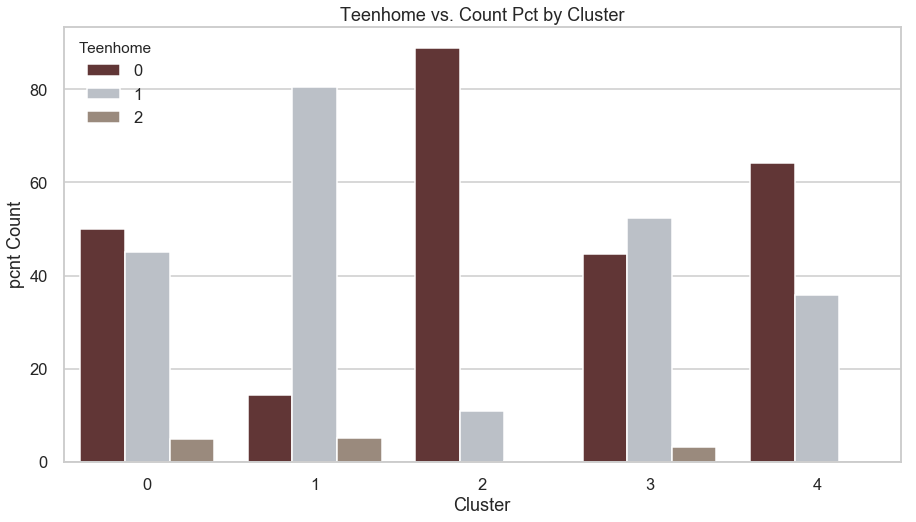

In [314]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 8))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_Teenhome", hue="Teenhome", data=result_Teenhome_spend, palette = pal)

# Set labels and title
plt.xlabel("Cluster")
plt.ylabel("pcnt Count")
plt.title("Teenhome vs. Count Pct by Cluster")

# Show the plot

* Cluster 2 again has most customers with 0 teen at house 
* Cluster 3 has mix of 0, 1 and 2 teens
* cluster 4 has 0 or 1 teen at home
* Cluster 1 has most customers with 1 Teen

### Summary for Children


* Cluster 0 – tends to have 1 kid and 1 teen at home, sometimes 3 kids
* Cluster 1 – tends to have 1 teen at home and less chance of having kids
* Cluster 2 – tends to be customers with 0 kids or teens
* Cluster 3 – tends to have atleast 1 kid, sometimes 3
* Cluster 4 – tends to have 1 or 2 kids at home



### Complain

In [255]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]
# Define the SQL query
query = '''
    select 
        k_means_Cluster
    ,   gr_child.Complain
    ,   avg_spent
    ,   count
    ,   Complain_count
    ,   (count/Complain_count)*100 as pct_of_Complain
    from 
    (SELECT 
        k_means_Cluster
        , Complain
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        Complain
        , count(*) as Complain_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.Complain = child.Complain
   order by 2,1
'''

# query = '''
    
#    SELECT 
#         Children
#         , count(*) as child_count
#     FROM cst
#    group by 1
#    order by 2
# '''

# Execute the SQL query using sqldf
result_Complain_spend = sqldf(query, globals())

# Print the result
print(result_Complain_spend)
result_Complain_spend['pct_of_Complain'] = (result_Complain_spend['count']/result_Complain_spend['Complain_count'])* 100
result_Complain_spend

   k_means_Cluster  Complain  avg_spent  count  Complain_count  \
0                1         0      834.0    557            2185   
1                2         0     1398.0    526            2185   
2                3         0      110.0    642            2185   
3                4         0      130.0    460            2185   
4                0         1      392.0     20              20   

   pct_of_Complain  
0                0  
1                0  
2                0  
3                0  
4              100  


,k_means_Cluster,Complain,avg_spent,count,Complain_count,pct_of_Complain
0,1,0,834.0,557,2185,25.491991
1,2,0,1398.0,526,2185,24.073227
2,3,0,110.0,642,2185,29.382151
3,4,0,130.0,460,2185,21.052632
4,0,1,392.0,20,20,100.000000


Text(0.5, 1.0, 'Complain vs. Count Pct by Cluster')

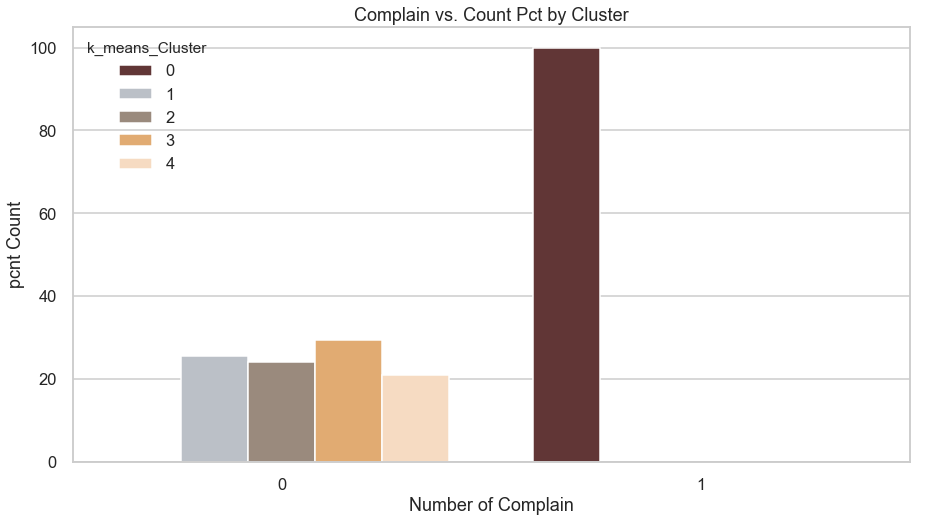

In [256]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 8))
# Create the bar plot
sns.barplot(x="Complain", y="pct_of_Complain", hue="k_means_Cluster", data=result_Complain_spend, palette = pal)

# Set labels and title
plt.xlabel("Number of Complain")
plt.ylabel("pcnt Count")
plt.title("Complain vs. Count Pct by Cluster")

# Show the plot

* Only cluster 0 have customers who have filed complaints, this are the customers who are not happy with the service

### Number of Web Visits

In [311]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Number of web visits are ranging from 0 to 10, lets create two categories 0-10 and 10 to 20
# Define the SQL query
query = '''
    select 
        k_means_Cluster
    ,   gr_child.NumWebVisitsMonth_grp
    ,   avg_spent
    ,   count
    ,   web_visit_count
    ,   (count/web_visit_count)*100 as pct_of_web_visit_count
    from 
    (SELECT 
        k_means_Cluster
        , case when NumWebVisitsMonth <= 10 then 'lt_10'
            else 'gt_10' end as NumWebVisitsMonth_grp
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        case when NumWebVisitsMonth <= 10 then 'lt_10'
            else 'gt_10' end as NumWebVisitsMonth_grp
        , count(*) as web_visit_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.NumWebVisitsMonth_grp = child.NumWebVisitsMonth_grp
   order by 2,1
'''

# query = '''
    
#    SELECT 
#         NumWebVisitsMonth
#         , count(*) as child_count
#     FROM cst
#    group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_web_visits_spend = sqldf(query, globals())

# Print the result
print(result_web_visits_spend)
result_web_visits_spend['pct_of_web_visit_count'] = (result_web_visits_spend['count']/result_web_visits_spend['web_visit_count'])* 100
result_web_visits_spend

   k_means_Cluster NumWebVisitsMonth_grp  avg_spent  count  web_visit_count  \
0                3                 gt_10       57.0      4                9   
1                4                 gt_10      114.0      5                9   
2                0                 lt_10      392.0     20             2196   
3                1                 lt_10      834.0    557             2196   
4                2                 lt_10     1398.0    526             2196   
5                3                 lt_10      110.0    638             2196   
6                4                 lt_10      130.0    455             2196   

   pct_of_web_visit_count  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
5                       0  
6                       0  


,k_means_Cluster,NumWebVisitsMonth_grp,avg_spent,count,web_visit_count,pct_of_web_visit_count
0,3,gt_10,57.0,4,9,44.444444
1,4,gt_10,114.0,5,9,55.555556
2,0,lt_10,392.0,20,2196,0.910747
3,1,lt_10,834.0,557,2196,25.364299
4,2,lt_10,1398.0,526,2196,23.952641
5,3,lt_10,110.0,638,2196,29.052823
6,4,lt_10,130.0,455,2196,20.719490


Text(0.5, 1.0, 'Web Vists vs. Count Pct by Cluster')

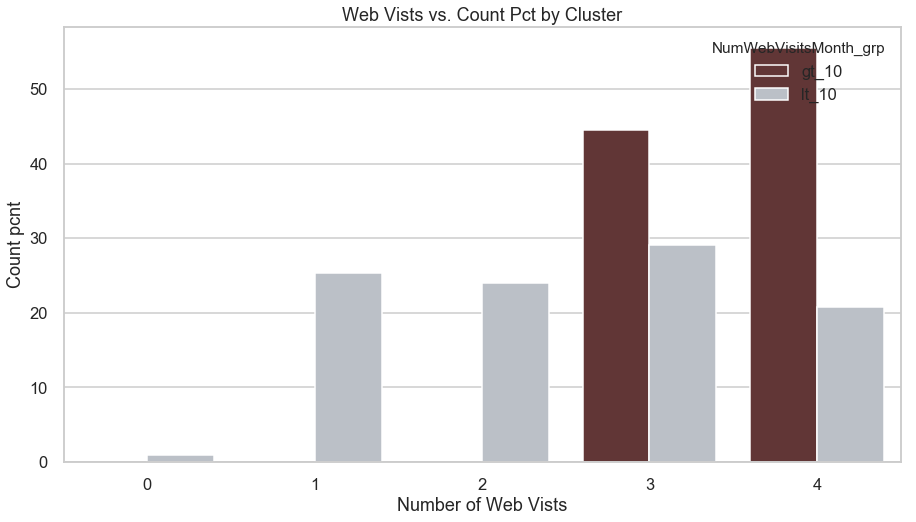

In [312]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 8))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_web_visit_count", hue="NumWebVisitsMonth_grp", data=result_web_visits_spend, palette = pal)

# Set labels and title
plt.xlabel("Number of Web Vists")
plt.ylabel("Count pcnt")
plt.title("Web Vists vs. Count Pct by Cluster")

# Show the plot

* Only Customers in Cluster 3 and 4 make more than 10 web Visits per months

### Days as Customers

In [268]:
# Calculate the median, 1st quartile, and 3rd quartile
median = cst['Days_as_customer'].quantile(0.5)
first_quartile = cst['Days_as_customer'].quantile(0.25)
third_quartile = cst['Days_as_customer'].quantile(0.75)

# Print the results
print("Median:", median)
print("1st Quartile:", first_quartile)
print("3rd Quartile:", third_quartile)

Median: 3631.0
1st Quartile: 3458.0
3rd Quartile: 3804.0


For Number of days as a customer we can use the median vakues to create buckets and look to see if there are any information from that

In [294]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
       gr_child.k_means_Cluster
    ,   gr_child.Days_as_customer_grp
    ,   avg_spent
    ,   count
    ,   days_as_cust_count
    ,   (count/days_as_cust_count)*100 as pct_of_days_As_cust
    from 
    (SELECT 
        k_means_Cluster
        ,         case when Days_as_customer <= 3458.0 then 'lt_1st Quartile'
             when Days_as_customer <= 3804.0 and Days_as_customer > 3458.0 then 'btwn 1st and 3rd Quartile'
             else 'gt_than 3 quartile' end as Days_as_customer_grp
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        -- case when Days_as_customer <= 3458.0 then 'lt_1st Quartile'
        --      when Days_as_customer <= 3804.0 and Days_as_customer > 3458.0 then 'btwn 1st and 3rd Quartile'
        --      else 'gt_than 3 quartile' end as Days_as_customer_grp
        k_means_Cluster
        , count(*) as days_as_cust_count
    FROM cst
   group by 1
   order by 2) child
  --  on gr_child.Days_as_customer_grp = child.Days_as_customer_grp
  on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 2,1
'''

# query = '''
    
#    SELECT 
#         -- Days_as_customer
#         -- , count(*) as child_count
#         -- , 
#          PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY Days_as_customer) AS median
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_dac_spend = sqldf(query, globals())

# Print the result
print(result_web_visits_spend)
result_dac_spend['pct_of_dac_count'] = (result_dac_spend['count']/result_dac_spend['days_as_cust_count'])* 100
result_dac_spend

   avg(Days_as_customer)
0            3630.062585


,k_means_Cluster,Days_as_customer_grp,avg_spent,count,days_as_cust_count,pct_of_days_As_cust,pct_of_dac_count
0,0,btwn 1st and 3rd Quartile,515.0,8,20,0,40.000000
1,1,btwn 1st and 3rd Quartile,821.0,282,557,0,50.628366
2,2,btwn 1st and 3rd Quartile,1394.0,256,526,0,48.669202
3,3,btwn 1st and 3rd Quartile,116.0,325,642,0,50.623053
4,4,btwn 1st and 3rd Quartile,136.0,231,460,0,50.217391
5,0,gt_than 3 quartile,304.0,9,20,0,45.000000
6,1,gt_than 3 quartile,907.0,186,557,0,33.393178
7,2,gt_than 3 quartile,1483.0,135,526,0,25.665399
8,3,gt_than 3 quartile,126.0,120,642,0,18.691589
9,4,gt_than 3 quartile,153.0,100,460,0,21.739130


Text(0.5, 1.0, 'Days as Customer vs. Count Pct by Cluster')

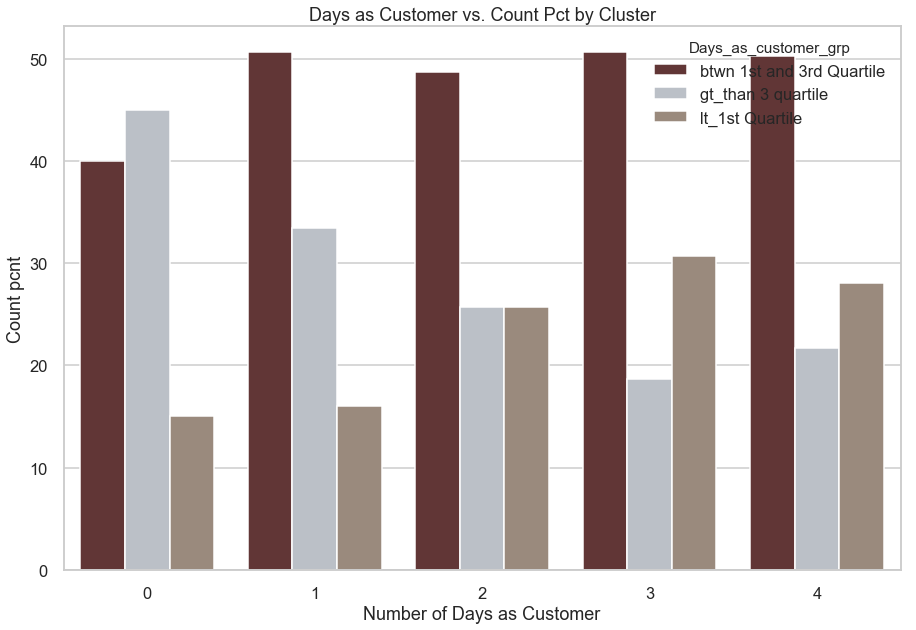

In [397]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_dac_count", hue="Days_as_customer_grp", data=result_dac_spend, palette = pal)
# Optimize spacing
# Set labels and title
plt.xlabel("Number of Days as Customer")
plt.ylabel("Count pcnt")
plt.title("Days as Customer vs. Count Pct by Cluster")

# Show the plot

* Cluster 0 and 1 are more old time customers and needs to be made sure that their lifetime value increases further by providing coupons or gift cards
* Cluster 2 and 3 are more in between, these customers can be targeted with price discounts and promos to increase their LTV
* Cluster 4 are more new customers and we need to make sure that they stick around longer


## Age

Age range is from 27 to 83, so we will need to create some groups
* Less than 40 - Youngsters
* 40 - 60 : Middleaged
* 60 and above Retired

In [278]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        k_means_Cluster
    ,   gr_child.Age_Group
    ,   avg_spent
    ,   count
    ,   Age_count
    ,   (count/Age_count)*100 as pct_of_Age
    from 
    (SELECT 
        k_means_Cluster
        ,         case when Age <= 40 then 'Youth'
             when Age <= 60 and Age > 40 then 'Middle Aged'
             else 'Retired' end as Age_Group
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        case when Age <= 40 then 'Youth'
             when Age <= 60 and Age > 40 then 'Middle Aged'
             else 'Retired' end as Age_Group
        , count(*) as Age_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.Age_Group = child.Age_Group
   order by 2,1
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_Age_spend = sqldf(query, globals())

# Print the result
print(result_Age_spend)
result_Age_spend['pct_of_Age'] = (result_Age_spend['count']/result_Age_spend['Age_count'])* 100
result_Age_spend

    k_means_Cluster    Age_Group  avg_spent  count  Age_count  pct_of_Age
0                 0  Middle Aged      225.0      7       1221           0
1                 1  Middle Aged      843.0    326       1221           0
2                 2  Middle Aged     1413.0    227       1221           0
3                 3  Middle Aged      106.0    401       1221           0
4                 4  Middle Aged      124.0    260       1221           0
5                 0      Retired      518.0      9        686           0
6                 1      Retired      830.0    215        686           0
7                 2      Retired     1363.0    204        686           0
8                 3      Retired      135.0    153        686           0
9                 4      Retired      151.0    105        686           0
10                0        Youth      400.0      4        298           0
11                1        Youth      713.0     16        298           0
12                2        Youth     1

,k_means_Cluster,Age_Group,avg_spent,count,Age_count,pct_of_Age
0,0,Middle Aged,225.0,7,1221,0.573301
1,1,Middle Aged,843.0,326,1221,26.699427
2,2,Middle Aged,1413.0,227,1221,18.591319
3,3,Middle Aged,106.0,401,1221,32.841933
4,4,Middle Aged,124.0,260,1221,21.294021
5,0,Retired,518.0,9,686,1.311953
6,1,Retired,830.0,215,686,31.341108
7,2,Retired,1363.0,204,686,29.737609
8,3,Retired,135.0,153,686,22.303207
9,4,Retired,151.0,105,686,15.306122


Text(0.5, 1.0, 'Age Buckets vs. Count Pct by Cluster')

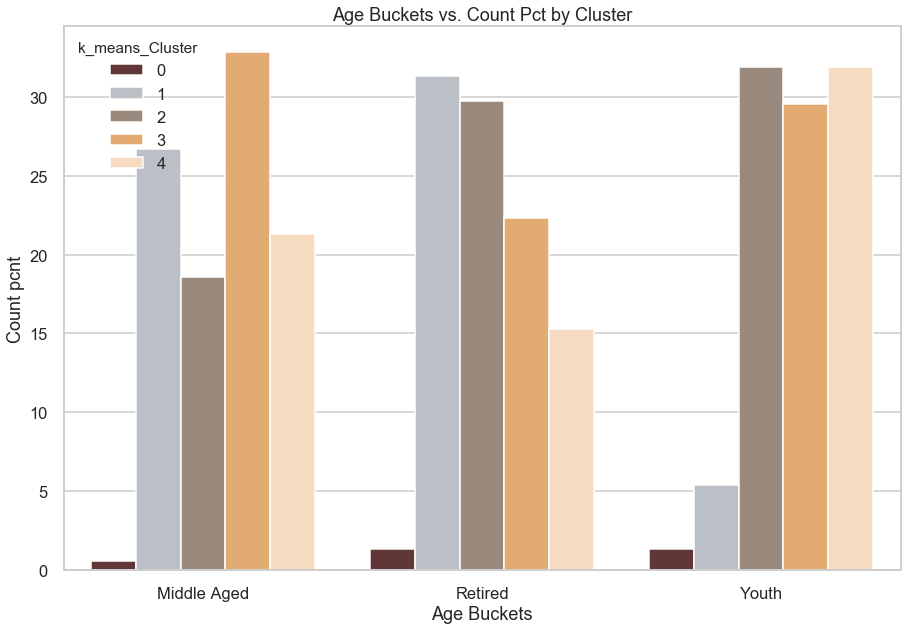

In [282]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="Age_Group", y="pct_of_Age", hue="k_means_Cluster", data=result_Age_spend, palette = pal)

# Set labels and title
plt.xlabel("Age Buckets")
plt.ylabel("Count pcnt")
plt.title("Age Buckets vs. Count Pct by Cluster")

# Show the plot

In [286]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.Age_Group
    ,   avg_spent
    ,   count
    ,   Age_count
    ,   (count/Age_count)*100 as pct_of_Age
    from 
    (SELECT 
        k_means_Cluster
        ,         case when Age <= 40 then 'Youth'
             when Age <= 60 and Age > 40 then 'Middle Aged'
             else 'Retired' end as Age_Group
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as Age_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_Age_spend = sqldf(query, globals())

# Print the result
print(result_Age_spend)
result_Age_spend['pct_of_Age'] = (result_Age_spend['count']/result_Age_spend['Age_count'])* 100
result_Age_spend

    k_means_Cluster    Age_Group  avg_spent  count  Age_count  pct_of_Age
0                 0  Middle Aged      225.0      7         20           0
1                 0      Retired      518.0      9         20           0
2                 0        Youth      400.0      4         20           0
3                 1  Middle Aged      843.0    326        557           0
4                 1      Retired      830.0    215        557           0
5                 1        Youth      713.0     16        557           0
6                 2  Middle Aged     1413.0    227        526           0
7                 2      Retired     1363.0    204        526           0
8                 2        Youth     1438.0     95        526           0
9                 3  Middle Aged      106.0    401        642           0
10                3      Retired      135.0    153        642           0
11                3        Youth       81.0     88        642           0
12                4  Middle Aged      

,k_means_Cluster,Age_Group,avg_spent,count,Age_count,pct_of_Age
0,0,Middle Aged,225.0,7,20,35.000000
1,0,Retired,518.0,9,20,45.000000
2,0,Youth,400.0,4,20,20.000000
3,1,Middle Aged,843.0,326,557,58.527828
4,1,Retired,830.0,215,557,38.599641
5,1,Youth,713.0,16,557,2.872531
6,2,Middle Aged,1413.0,227,526,43.155894
7,2,Retired,1363.0,204,526,38.783270
8,2,Youth,1438.0,95,526,18.060837
9,3,Middle Aged,106.0,401,642,62.461059


Text(0.5, 1.0, 'Age Buckets vs. Count Pct by Cluster')

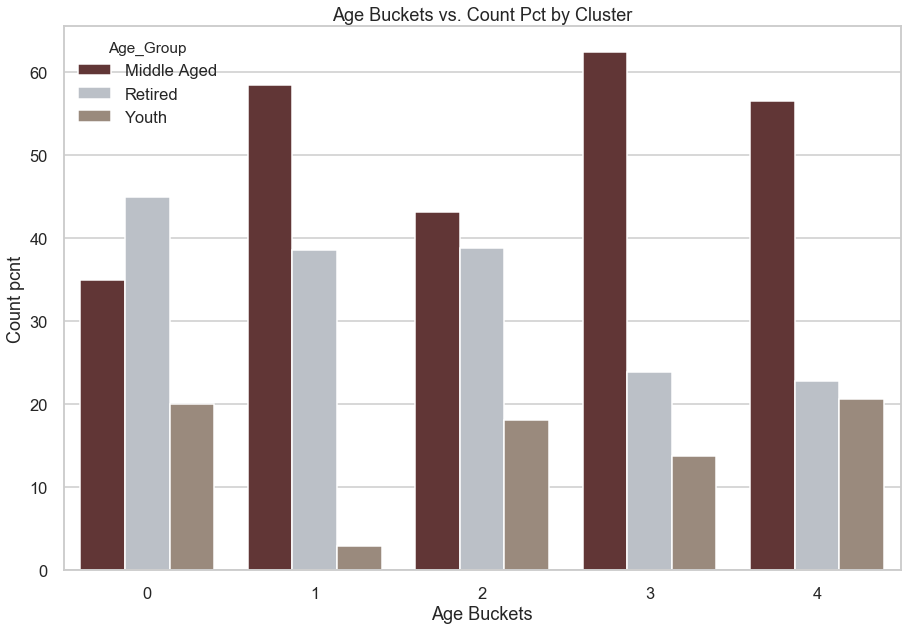

In [288]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_Age", hue="Age_Group", data=result_Age_spend, palette = pal)

# Set labels and title
plt.xlabel("Clusters")
plt.ylabel("Count pcnt")
plt.title("Age Buckets vs. Count Pct by Cluster")

# Show the plot

Text(0.5, 1.0, 'Age Buckets vs. Count Pct by Cluster')

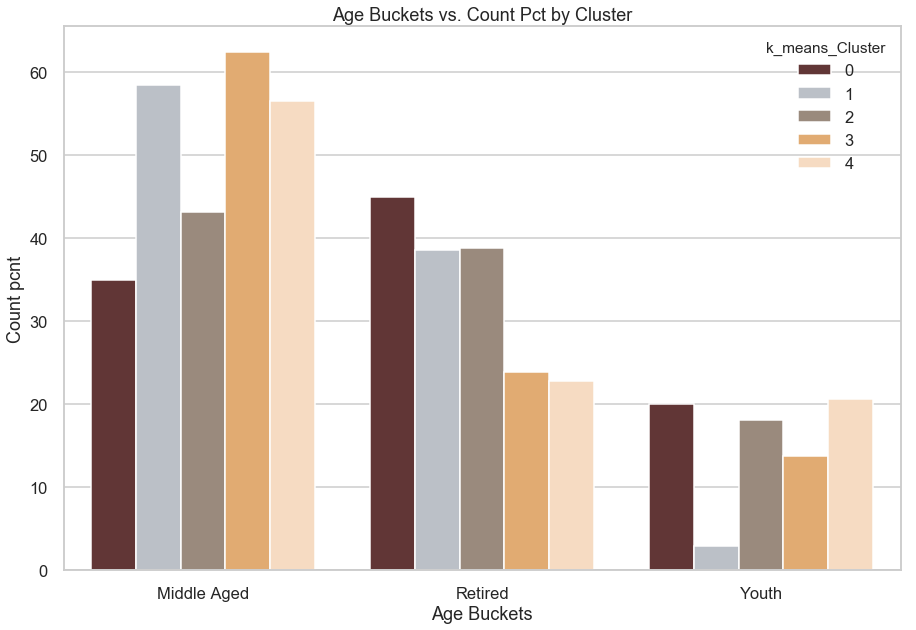

In [307]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="Age_Group", y="pct_of_Age", hue="k_means_Cluster", data=result_Age_spend, palette = pal)

# Set labels and title
plt.xlabel("Age Buckets")
plt.ylabel("Count pcnt")
plt.title("Age Buckets vs. Count Pct by Cluster")

# Show the plot

* Cluster 0 has a good mix but dominated by retired people
* Cluster 1 has mostly Middleaged and Retired People and very less youth
* Cluster 2 has a mix of retired and Middle aged people
* cluster 3 and 4 are Dominated by mostly middle aged people

### Members in Household

In [303]:
cst.members_in_hsld.unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [306]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.members_in_hsld
    ,   avg_spent
    ,   count
    ,   mih_count
    ,   (count/mih_count)*100 as pct_of_mbr_in_hsld
    from 
    (SELECT 
        k_means_Cluster
        ,  members_in_hsld
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as mih_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_mih_spend = sqldf(query, globals())

# Print the result
# print(result_mih_spend)
result_mih_spend['pct_of_mbr_in_hsld'] = (result_mih_spend['count']/result_mih_spend['mih_count'])* 100
result_mih_spend

,k_means_Cluster,members_in_hsld,avg_spent,count,mih_count,pct_of_mbr_in_hsld
0,0,1,1365.0,1,20,5.000000
1,0,2,393.0,5,20,25.000000
2,0,3,391.0,11,20,55.000000
3,0,4,54.0,2,20,10.000000
4,0,5,99.0,1,20,5.000000
5,1,1,860.0,7,557,1.256732
6,1,2,855.0,147,557,26.391382
7,1,3,848.0,326,557,58.527828
8,1,4,714.0,69,557,12.387792
9,1,5,903.0,8,557,1.436266


Text(0.5, 1.0, 'Members in Household vs. Count Pct by Cluster')

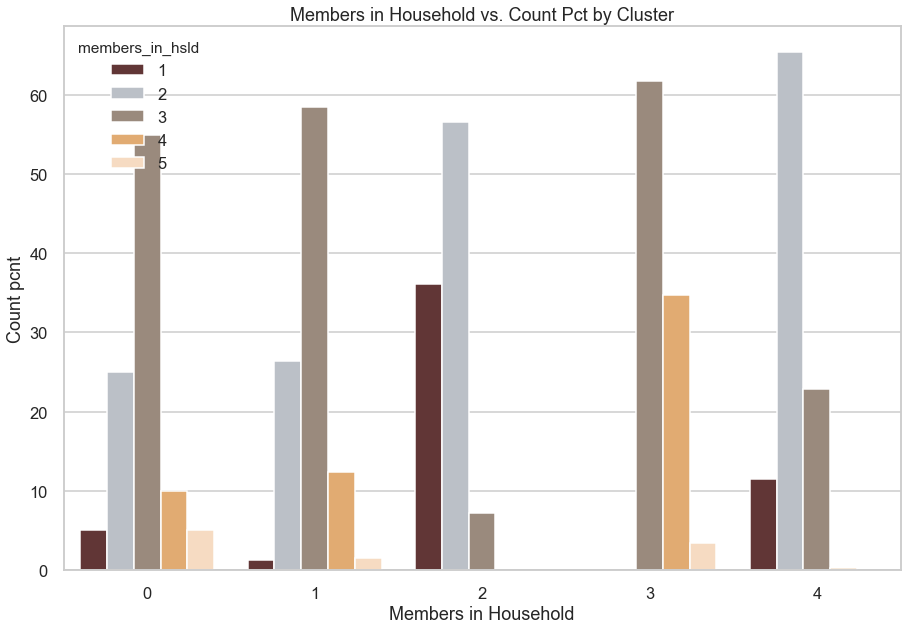

In [319]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_mbr_in_hsld", hue="members_in_hsld", data=result_mih_spend, palette = pal)

# Set labels and title
plt.xlabel("Members in Household")
plt.ylabel("Count pcnt")
plt.title("Members in Household vs. Count Pct by Cluster")

# Show the plot

* Cluster 0, 1 and 3 are predominantly family homes with atleast 3 members
* Cluster 3 have more than 1 kid
* Cluster 2 has mostly couple or singles without kids
* Cluster 4 is also mostly couples with less kids

## Parent

In [364]:
cst2.Parent.unique()

array([0, 1], dtype=int64)

In [320]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.Parent
    ,   avg_spent
    ,   count
    ,   prnt_count
    ,   (count/prnt_count)*100 as pct_of_parents
    from 
    (SELECT 
        k_means_Cluster
        ,  Parent
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as prnt_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_prnt_spend = sqldf(query, globals())

# Print the result
# print(result_mih_spend)
result_prnt_spend['pct_of_parents'] = (result_prnt_spend['count']/result_prnt_spend['prnt_count'])* 100
result_prnt_spend

,k_means_Cluster,Parent,avg_spent,count,prnt_count,pct_of_parents
0,0,0,797.0,4,20,20.000000
1,0,1,291.0,16,20,80.000000
2,1,0,821.0,25,557,4.488330
3,1,1,835.0,532,557,95.511670
4,2,0,1409.0,461,526,87.642586
5,2,1,1324.0,65,526,12.357414
6,3,1,110.0,642,642,100.000000
7,4,0,153.0,138,460,30.000000
8,4,1,120.0,322,460,70.000000


Text(0.5, 1.0, 'Parents vs. Count Pct by Cluster')

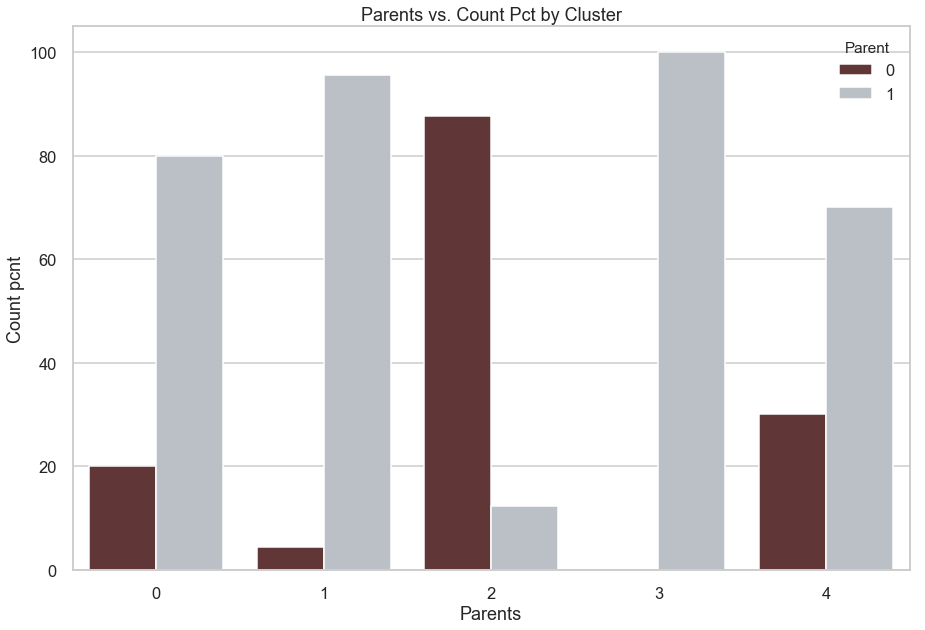

In [321]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_parents", hue="Parent", data=result_prnt_spend, palette = pal)

# Set labels and title
plt.xlabel("Parents")
plt.ylabel("Count pcnt")
plt.title("Parents vs. Count Pct by Cluster")

# Show the plot

As we have seen previously already
* Cluster 3 is predominanly Parents
* Cluster 2 is predominanly couples without kids or singles

### Education

In [326]:
cst['Education'] = cst1.Education

In [327]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.Education
    ,   avg_spent
    ,   count
    ,   Education_count
    ,   (count/Education_count)*100 as pct_of_Education
    from 
    (SELECT 
        k_means_Cluster
        ,  Education
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as Education_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_Education_spend = sqldf(query, globals())

# Print the result
# print(result_mih_spend)
result_Education_spend['pct_of_Education'] = (result_Education_spend['count']/result_Education_spend['Education_count'])* 100
result_Education_spend

,k_means_Cluster,Education,avg_spent,count,Education_count,pct_of_Education
0,0,Post Graduation,347.0,3,20,15.000000
1,0,graduate,380.0,14,20,70.000000
2,0,primary education,492.0,3,20,15.000000
3,1,Post Graduation,833.0,255,557,45.780969
4,1,graduate,839.0,267,557,47.935368
5,1,primary education,812.0,35,557,6.283662
6,2,Post Graduation,1478.0,190,526,36.121673
7,2,graduate,1380.0,287,526,54.562738
8,2,primary education,1195.0,49,526,9.315589
9,3,Post Graduation,113.0,244,642,38.006231


Text(0.5, 1.0, 'Education vs. Count Pct by Cluster')

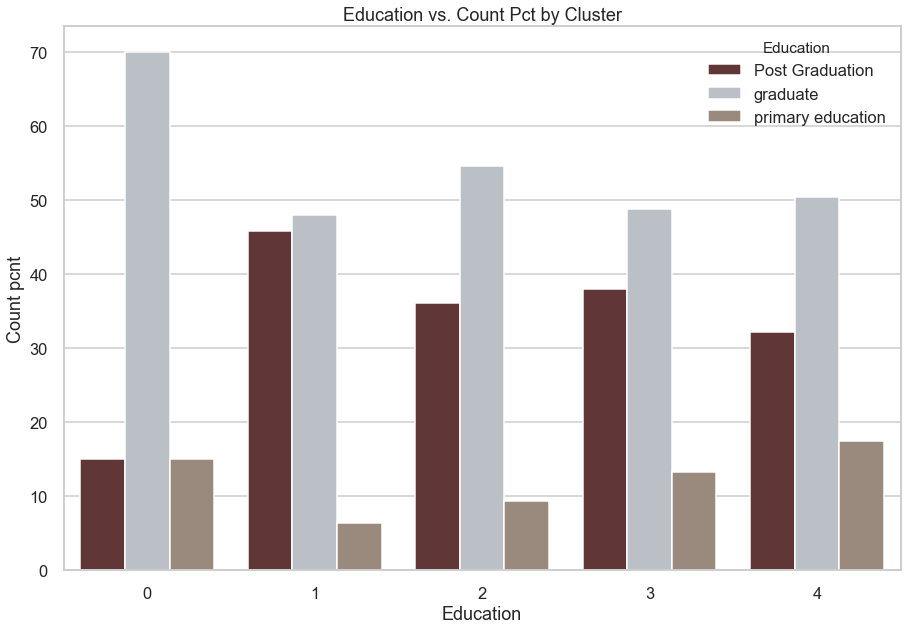

In [328]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_Education", hue="Education", data=result_Education_spend, palette = pal)

# Set labels and title
plt.xlabel("Education")
plt.ylabel("Count pcnt")
plt.title("Education vs. Count Pct by Cluster")

# Show the plot

* Cluster 0 is predominantly graduate
* Cluster 1 has high percent of  post graduates


## Marital Status

In [335]:
cst['Marital_Status'] = cst1.Marital_Status

In [336]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.Marital_Status
    ,   avg_spent
    ,   count
    ,   Marital_Status_count
    ,   (count/Marital_Status_count)*100 as pct_of_Marital_Status
    from 
    (SELECT 
        k_means_Cluster
        ,  Marital_Status
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as Marital_Status_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_Marital_Status_spend = sqldf(query, globals())

# Print the result
# print(result_mih_spend)
result_Marital_Status_spend['pct_of_Marital_Status'] = (result_Marital_Status_spend['count']/result_Marital_Status_spend['Marital_Status_count'])* 100
result_Marital_Status_spend

,k_means_Cluster,Marital_Status,avg_spent,count,Marital_Status_count,pct_of_Marital_Status
0,0,Couple,354.0,13,20,65.000000
1,0,Single,463.0,7,20,35.000000
2,1,Couple,837.0,389,557,69.838420
3,1,Single,828.0,168,557,30.161580
4,2,Couple,1416.0,308,526,58.555133
5,2,Single,1373.0,218,526,41.444867
6,3,Couple,110.0,627,642,97.663551
7,3,Single,84.0,15,642,2.336449
8,4,Couple,155.0,85,460,18.478261
9,4,Single,124.0,375,460,81.521739


Text(0.5, 1.0, 'Marital_Status vs. Count Pct by Cluster')

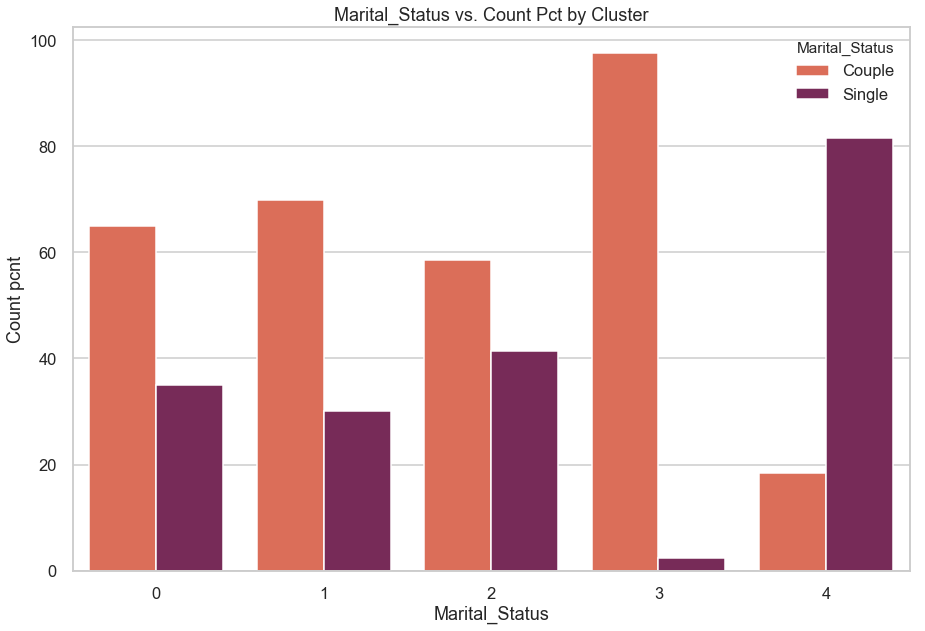

In [337]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_Marital_Status", hue="Marital_Status", data=result_Marital_Status_spend, palette = 'rocket_r')

# Set labels and titleMarital_Status
plt.xlabel("Marital_Status")
plt.ylabel("Count pcnt")
plt.title("Marital_Status vs. Count Pct by Cluster")

# Show the plot

* Cluster 3 has mostly couple
* cluster 4 has mostly Single
* whereas Clusters 0 1 and 2 have a mix

### Number of Deal Purchases

In [365]:
cst.NumDealsPurchases.unique()

array([ 3,  2,  1,  5,  4, 15,  7,  6,  9,  0,  8, 10, 13, 11, 12],
      dtype=int64)

In [348]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.NumDealsPurchases_grp
    ,   avg_spent
    ,   count
    ,   NumDealsPurchases_count
    ,   (count/NumDealsPurchases_count)*100 as pct_of_NumDealsPurchases
    from 
    (SELECT 
        k_means_Cluster
        ,  case when NumDealsPurchases <= 2 then 'lt_2'
            else 'gt_2' end as NumDealsPurchases_grp
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as NumDealsPurchases_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_NumDealsPurchases_spend = sqldf(query, globals())

# Print the result
# print(result_mih_spend)
result_NumDealsPurchases_spend['pct_of_NumDealsPurchases'] = (result_NumDealsPurchases_spend['count']/result_NumDealsPurchases_spend['NumDealsPurchases_count'])* 100
result_NumDealsPurchases_spend

,k_means_Cluster,NumDealsPurchases_grp,avg_spent,count,NumDealsPurchases_count,pct_of_NumDealsPurchases
0,0,gt_2,425.0,9,20,45.000000
1,0,lt_2,365.0,11,20,55.000000
2,1,gt_2,826.0,363,557,65.170557
3,1,lt_2,850.0,194,557,34.829443
4,2,gt_2,1278.0,18,526,3.422053
5,2,lt_2,1402.0,508,526,96.577947
6,3,gt_2,166.0,206,642,32.087227
7,3,lt_2,83.0,436,642,67.912773
8,4,gt_2,169.0,120,460,26.086957
9,4,lt_2,116.0,340,460,73.913043


Text(0.5, 1.0, 'Deal Purchases vs. Count Pct by Cluster')

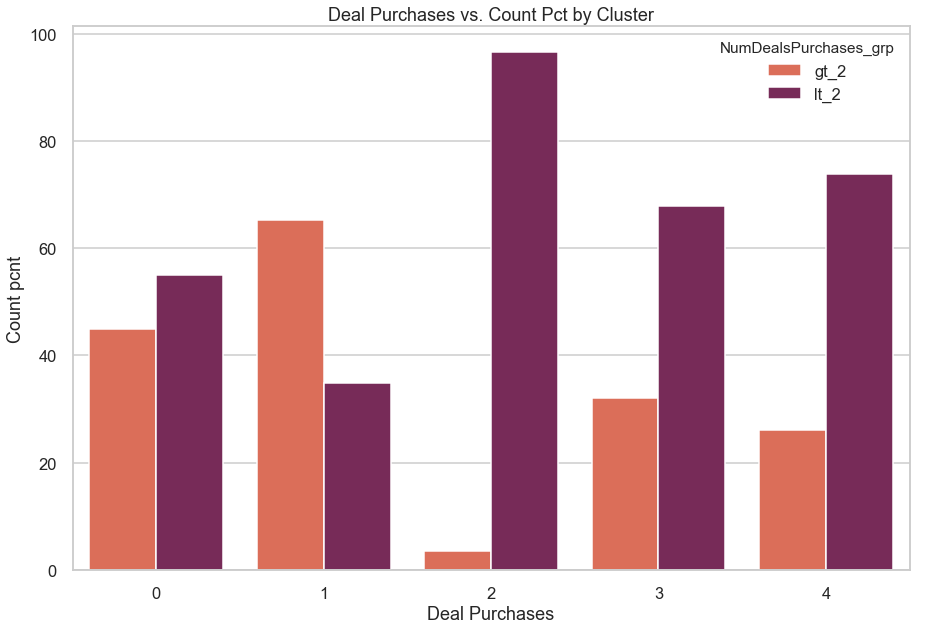

In [349]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_NumDealsPurchases", hue="NumDealsPurchases_grp", data=result_NumDealsPurchases_spend, palette = 'rocket_r')

# Set labels and titleMarital_Status
plt.xlabel("Deal Purchases")
plt.ylabel("Count pcnt")
plt.title("Deal Purchases vs. Count Pct by Cluster")

# Show the plot

* Cluster 2 does not purchase much deals
* Cluster 1 purchases a lot of deals

### Web Purchases

In [350]:
cst.NumWebPurchases.unique()

array([ 8,  1,  2,  5,  6,  7,  4,  3, 11,  0, 10,  9, 23, 27, 25],
      dtype=int64)

In [352]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.NumWebPurchases_grp
    ,   avg_spent
    ,   count
    ,   NumWebPurchases_count
    ,   (count/NumWebPurchases_count)*100 as pct_of_NumWebPurchases
    from 
    (SELECT 
        k_means_Cluster
        ,  case when NumWebPurchases <= 2 then 'lt_2'
            else 'gt_2' end as NumWebPurchases_grp
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as NumWebPurchases_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_NumWebPurchases_spend = sqldf(query, globals())

# Print the result
# print(result_mih_spend)
result_NumWebPurchases_spend['pct_of_NumWebPurchases'] = (result_NumWebPurchases_spend['count']/result_NumWebPurchases_spend['NumWebPurchases_count'])* 100
result_NumWebPurchases_spend

,k_means_Cluster,NumWebPurchases_grp,avg_spent,count,NumWebPurchases_count,pct_of_NumWebPurchases
0,0,gt_2,635.0,11,20,55.000000
1,0,lt_2,95.0,9,20,45.000000
2,1,gt_2,825.0,539,557,96.768402
3,1,lt_2,1103.0,18,557,3.231598
4,2,gt_2,1412.0,485,526,92.205323
5,2,lt_2,1241.0,41,526,7.794677
6,3,gt_2,199.0,239,642,37.227414
7,3,lt_2,57.0,403,642,62.772586
8,4,gt_2,236.0,176,460,38.260870
9,4,lt_2,64.0,284,460,61.739130


Text(0.5, 1.0, 'NumWebPurchases vs. Count Pct by Cluster')

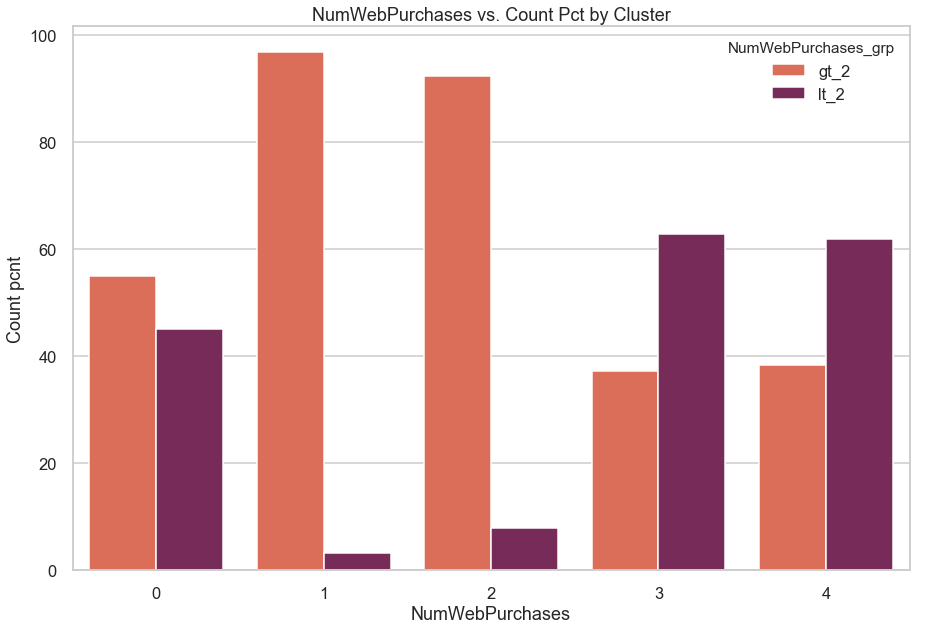

In [354]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_NumWebPurchases", hue="NumWebPurchases_grp", data=result_NumWebPurchases_spend, palette = 'rocket_r')

# Set labels and titleMarital_Status
plt.xlabel("NumWebPurchases")
plt.ylabel("Count pcnt")
plt.title("NumWebPurchases vs. Count Pct by Cluster")

# Show the plot

* Cluster 2 and 1 make the most of web purchases
* Where as cluster 3 and 4 donot make much web purchases

### Store Purchases

In [361]:
# ["Income", "Recency", "Kidhome","Teenhome", 'Complain', 'NumWebVisitsMonth', "Days_as_customer", "Age", "Children", "members_in_hsld", "Parent", "Education","Marital_Status"]

# Average number of days as customer is 3630.062585, we can look at people who are more and less than that 

query = '''
    select 
        gr_child.k_means_Cluster
    ,   gr_child.NumStorePurchases_grp
    ,   avg_spent
    ,   count
    ,   NumStorePurchases_count
    ,   (count/NumStorePurchases_count)*100 as pct_of_NumStorePurchases
    from 
    (SELECT 
        k_means_Cluster
        ,  case when NumStorePurchases <= 5 then 'lt_5'
            else 'gt_5' end as NumStorePurchases_grp
        ,   round(avg(Spent)) avg_spent
        , count(*) as count
    FROM cst
   group by 1,2
   order by 2,1) gr_child
   join 
   (SELECT 
        k_means_Cluster
        , count(*) as NumStorePurchases_count
    FROM cst
   group by 1
   order by 2) child
   on gr_child.k_means_Cluster = child.k_means_Cluster
   order by 1,2
'''

# query = '''
    
#    SELECT 
#         Age
#     FROM cst
#    -- group by 1
#    order by 1
# '''

# Execute the SQL query using sqldf
result_NumStorePurchases_spend = sqldf(query, globals())

# Print the result
# print(result_mih_spend)
result_NumStorePurchases_spend['pct_of_NumStorePurchases'] = (result_NumStorePurchases_spend['count']/result_NumStorePurchases_spend['NumStorePurchases_count'])* 100
result_NumStorePurchases_spend

,k_means_Cluster,NumStorePurchases_grp,avg_spent,count,NumStorePurchases_count,pct_of_NumStorePurchases
0,0,gt_5,844.0,7,20,35.000000
1,0,lt_5,149.0,13,20,65.000000
2,1,gt_5,844.0,448,557,80.430880
3,1,lt_5,792.0,109,557,19.569120
4,2,gt_5,1400.0,423,526,80.418251
5,2,lt_5,1390.0,103,526,19.581749
6,3,gt_5,302.0,43,642,6.697819
7,3,lt_5,96.0,599,642,93.302181
8,4,gt_5,360.0,41,460,8.913043
9,4,lt_5,107.0,419,460,91.086957


Text(0.5, 1.0, 'NumStorePurchases vs. Count Pct by Cluster')

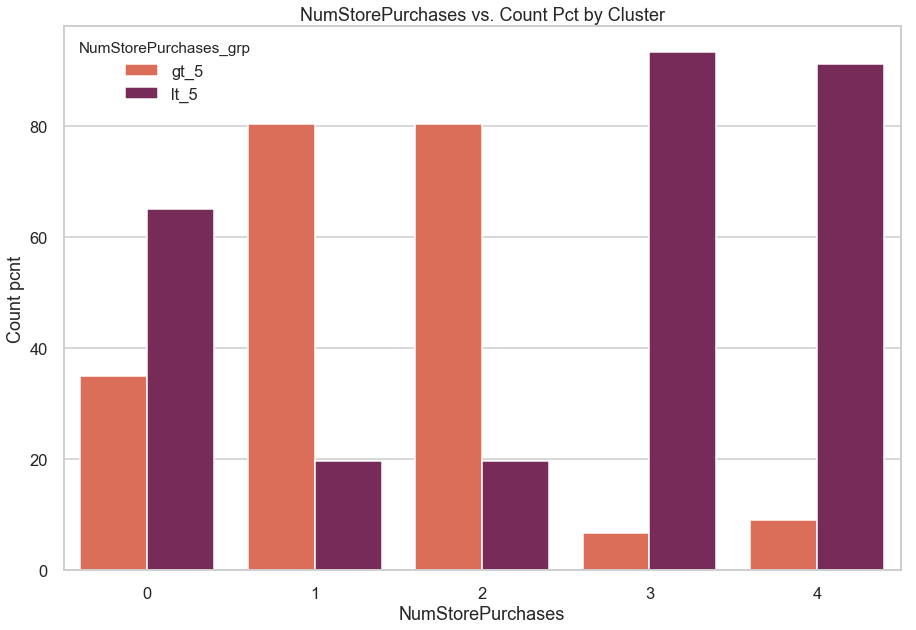

In [362]:
# Set the plot style
sns.set(style="whitegrid")
sns.set_context('talk')
plt.figure(figsize=(15, 10))
# Create the bar plot
sns.barplot(x="k_means_Cluster", y="pct_of_NumStorePurchases", hue="NumStorePurchases_grp", data=result_NumStorePurchases_spend, palette = 'rocket_r')

# Set labels and titleMarital_Status
plt.xlabel("NumStorePurchases")
plt.ylabel("Count pcnt")
plt.title("NumStorePurchases vs. Count Pct by Cluster")

# Show the plot

* Cluster 2 and 1 make a lot of store purchases
* Cluster 3 and 4 make very less store purchases

### Summary of learning from the clusters 

Cluster 0: Older couples with big families’ middle income middle spend - 
*  Income – Medium
*  Spend – Medium
*  Number of people in the cluster – 20 least
*  Mostly Bigger families with one or more teens and kids
*  This cluster also complains the most
*  Mostly older couples and retired
*  These are long term customers
*  Do not respond to promotions, deals but make lot of web visits

Resolutions – These are usually older couples with big families – 
*  Provide them with big family size products
*  Makes a lot of web visits maybe we can advertise such products and deals in the web
*  Long term customers provide them with gift coupons
*  Retired people provide senior citizen discounts
*  Customer support need to engage with them as they tend to complain the most


Cluster 1: Middle aged couple with smaller families’ middle income high spend:
*  Income – Medium
*  Spend – High
*  3 member families and mostly kids are teen
*  Middle-aged couples
*  Old time customers
*  Most educated among all the clusters
*  Makes a lot of web Visits
*  Makes a lot of in store visits
*  Responds to Promotions and Deals but after 4rth attempt


Resolutions Middle aged couples with smaller families– 
*  These customers are already spending high
*  Has lot of teenagers in the house can be targeted with new age products
*  Respond to deals and promotions can be targeted with deals for smaller families
*  Old time customers can be provided with gift coupons


Cluster 2: Middle aged to retired couples Income High spends high
*  Income – High
*  Spend – High
*  Smallest families mostly single
*  Middle aged to retired people
*  Makes a lot of web visits
*  Makes a lot of in store purchases
*  Responds to promotions



Resolutions Middle Aged Singles
*  Should not be targeted with Kids products
*  Target with small products for single people
*  Responds to promotions so can be targeted with deals though web pages
*  More in-between customers in terms of loyalty
*  Rich category can be targeted with luxurious products and apparels


Cluster 3 – Middle aged less income less spend
*  Income – Less
*  Spend - Less
*  Smaller families 
*  Mostly Married people with 2 kids
*  Middle aged
*  Mostly newer customers
*  Education background has a mix of Graduate and High school people
*  Does not make in store purchases
*  Does not make web Visits
*  Does not respond to promotions


Resolution:
*  These are one of the two clusters that are not buying much
*  Do not respond well to promotions
*  May spend less on targeting this cluster and focus more on people from other clusters


Cluster 4 – Young couples less income less spend
*  Income – Least
*  Spend – Less
*  Compact families with kids mostly
*  Younger people
*  Less educated mostly High school
*  Newer customers
*  Does not purchase from Stores, Web
*  Does not respond to offers or deals


Resolution:
*  These are younger couples with small means of income, can be attracted with large discounts
*  Harder to convert but are similar to Cluster 0 and 3 so some of them can become long term customers
*  Deals need to be specifically made keeping in mind lower income customers
